# 🧠 Mental Health Depression Prediction - Exploratory Data Analysis

## Phase 2: Basic Data Exploration

**Objective**: Understand dataset structure, identify data quality issues, and perform initial feature analysis

**Dataset**: Mental health survey data with 140,700 training samples and 93,800 test samples

**Target**: Depression (Binary: 0=No Depression, 1=Depression)

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import joblib

from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import chi2_contingency
import warnings
# modeling libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




# Configure settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.3
🔢 NumPy version: 1.26.4


## Compatability check

In [3]:
import importlib
import numpy as np
import sys

print(f"🔢 Active NumPy version: {np.__version__}\n")

# List of commonly used data science / ML libraries
libraries = [
    "pandas",
    "scipy",
    "sklearn",
    "torch",
    "plotly",
    "imblearn",
    "matplotlib",
    "seaborn"
]

incompatible = []

for lib in libraries:
    try:
        module = importlib.import_module(lib)
        # Try to print version
        version = getattr(module, "__version__", "unknown")
        print(f"✅ {lib:10s} — version {version}")
    except Exception as e:
        print(f"❌ {lib:10s} — failed to import ({e.__class__.__name__})")
        incompatible.append(lib)

print("\n📦 Python executable:", sys.executable)

if incompatible:
    print("\n⚠️ Some libraries failed to import. You may need to reinstall them.")
else:
    print("\n🎯 All libraries imported successfully — your environment is consistent!")


🔢 Active NumPy version: 1.26.4

✅ pandas     — version 2.3.3
✅ scipy      — version 1.13.1
✅ sklearn    — version 1.6.1
✅ torch      — version 2.2.2
✅ plotly     — version 6.3.0
✅ imblearn   — version 0.12.4
✅ matplotlib — version 3.9.4
✅ seaborn    — version 0.13.2

📦 Python executable: /Users/muralidharanv/Documents/GUVI /PROJECTS/Mental Health Survey/mental_health_env/bin/python

🎯 All libraries imported successfully — your environment is consistent!


##  Subtask 2.2.1: Load and Examine Dataset Structure

In [44]:
# Load the datasets
train_path = '../data/playground-series-s4e11/train.csv'
test_path = '../data/playground-series-s4e11/test.csv'

# Load training data
print(" Loading training dataset...")
train_df = pd.read_csv(train_path)
print(f" Training data loaded: {train_df.shape}")

# Load test data
print(" Loading test dataset...")
test_df = pd.read_csv(test_path)
print(f" Test data loaded: {test_df.shape}")

print(f"\n Dataset Overview:")
print(f"   Training samples: {train_df.shape[0]:,}")
print(f"   Test samples: {test_df.shape[0]:,}")
print(f"   Total features: {train_df.shape[1]-1} (excluding target)")
print(f"   Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 Loading training dataset...
 Training data loaded: (140700, 20)
 Loading test dataset...
 Test data loaded: (93800, 19)

 Dataset Overview:
   Training samples: 140,700
   Test samples: 93,800
   Total features: 19 (excluding target)
   Memory usage: 96.19 MB


In [45]:
# Display first few rows
print(" First 5 rows of training data:")
display(train_df.head())

print("\n Column names and data types:")
column_info = pd.DataFrame({
    'Column': train_df.columns,
    'Data Type': train_df.dtypes,
    'Non-Null Count': train_df.count(),
    'Null Count': train_df.isnull().sum(),
    'Null %': (train_df.isnull().sum() / len(train_df) * 100).round(2)
})
display(column_info)

 First 5 rows of training data:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0



 Column names and data types:


,Column,Data Type,Non-Null Count,Null Count,Null %
id,id,int64,140700,0,0.00
Name,Name,object,140700,0,0.00
Gender,Gender,object,140700,0,0.00
Age,Age,int64,140700,0,0.00
City,City,object,140700,0,0.00
Working Professional or Student,Working Professional or Student,object,140700,0,0.00
Profession,Profession,object,104062,36638,26.04
Academic Pressure,Academic Pressure,float64,27897,112803,80.17
Work Pressure,Work Pressure,float64,112782,27918,19.84
CGPA,CGPA,float64,27898,112802,80.17


##  Subtask 2.2.2: Generate Basic Statistical Summaries

In [46]:
# Basic info about the dataset
print(" Dataset Information:")
train_df.info()

print("\n Numerical features summary:")
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')
    
display(train_df[numerical_cols].describe())

 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104062 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [47]:
# Categorical features summary
print(" Categorical features summary:")
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n {col}:")
    print(f"   Unique values: {train_df[col].nunique()}")
    print(f"   Most frequent: {train_df[col].mode().iloc[0]}")
    if train_df[col].nunique() <= 10:
        print(f"   Value counts:")
        print(train_df[col].value_counts().to_string())
    else:
        print(f"   Top 5 values:")
        print(train_df[col].value_counts().head().to_string())

 Categorical features summary:

 Name:
   Unique values: 422
   Most frequent: Rohan
   Top 5 values:
Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035

 Gender:
   Unique values: 2
   Most frequent: Male
   Value counts:
Gender
Male      77464
Female    63236

 City:
   Unique values: 98
   Most frequent: Kalyan
   Top 5 values:
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613

 Working Professional or Student:
   Unique values: 2
   Most frequent: Working Professional
   Value counts:
Working Professional or Student
Working Professional    112799
Student                  27901

 Profession:
   Unique values: 58
   Most frequent: Teacher
   Top 5 values:
Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022

 Sleep Duration:
   Unique values: 36
   Most frequent: Less than 5 hours
   Top 5 values:
Sleep Duration
Le

##  Subtask 2.2.3: Identify Missing Values and Data Quality Issues

 Missing Values Analysis:


,Column,Missing Count,Missing %
7,Academic Pressure,112803,80.172708
10,Study Satisfaction,112803,80.172708
9,CGPA,112802,80.171997
6,Profession,36638,26.039801
8,Work Pressure,27918,19.842217
11,Job Satisfaction,27910,19.836532
13,Dietary Habits,4,0.002843
17,Financial Stress,4,0.002843
14,Degree,2,0.001421


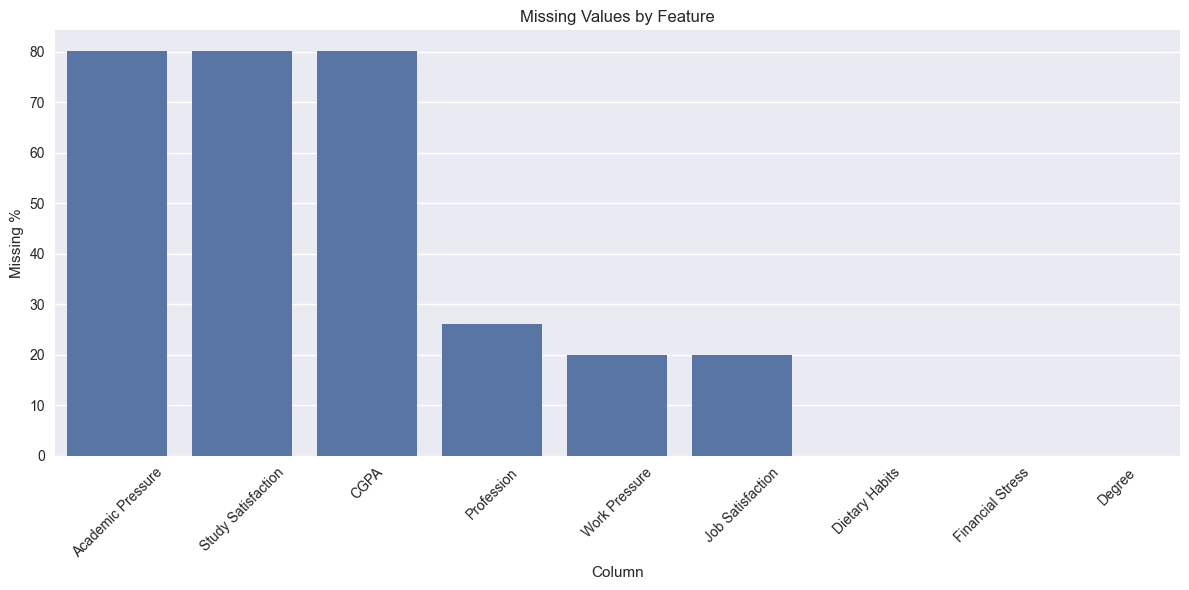

In [48]:
# Missing values analysis
print(" Missing Values Analysis:")
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing %': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_df, x='Column', y='Missing %')
    plt.title('Missing Values by Feature')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values found in the dataset!")

In [49]:
# Check for duplicates
print(" Duplicate Analysis:")
total_duplicates = train_df.duplicated().sum()
print(f"   Total duplicate rows: {total_duplicates}")
print(f"   Duplicate percentage: {(total_duplicates/len(train_df)*100):.2f}%")

# Check for duplicate IDs
duplicate_ids = train_df['id'].duplicated().sum()
print(f"   Duplicate IDs: {duplicate_ids}")

if total_duplicates > 0:
    print("\n Duplicate rows found! These will need to be handled.")
else:
    print("\n No duplicate rows found!")

 Duplicate Analysis:
   Total duplicate rows: 0
   Duplicate percentage: 0.00%
   Duplicate IDs: 0

 No duplicate rows found!


##  Subtask 2.2.4: Analyze Target Variable Distribution and Class Balance

In [50]:
# Target variable analysis
print(" Target Variable Analysis (Depression):")
target_counts = train_df['Depression'].value_counts().sort_index()
target_props = train_df['Depression'].value_counts(normalize=True).sort_index() * 100

print(f"\n Class Distribution:")
for i, (count, prop) in enumerate(zip(target_counts, target_props)):
    label = "No Depression" if i == 0 else "Depression"
    print(f"   {label} (Class {i}): {count:,} samples ({prop:.1f}%)")

# Calculate class imbalance ratio
class_ratio = target_counts.max() / target_counts.min()
print(f"\n Class Imbalance Ratio: {class_ratio:.2f}:1")

if class_ratio > 2:
    print(" Significant class imbalance detected! Consider using techniques like SMOTE, class weights, or stratified sampling.")
else:
    print(" Classes are reasonably balanced.")

 Target Variable Analysis (Depression):

 Class Distribution:
   No Depression (Class 0): 115,133 samples (81.8%)
   Depression (Class 1): 25,567 samples (18.2%)

 Class Imbalance Ratio: 4.50:1
 Significant class imbalance detected! Consider using techniques like SMOTE, class weights, or stratified sampling.


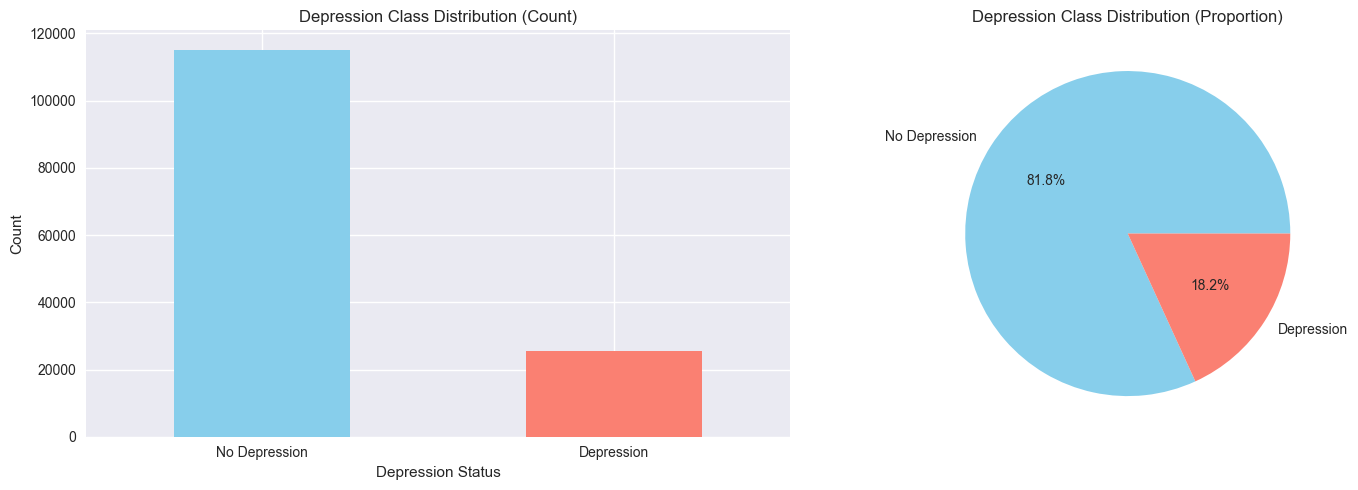

In [51]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Depression Class Distribution (Count)')
axes[0].set_xlabel('Depression Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Depression', 'Depression'], rotation=0)

# Pie chart
axes[1].pie(target_counts.values, labels=['No Depression', 'Depression'], 
           autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Depression Class Distribution (Proportion)')

plt.tight_layout()
plt.show()

##  Subtask 2.2.5: Create Initial Data Overview Report

In [52]:
# Comprehensive data overview report
print(" COMPREHENSIVE DATA OVERVIEW REPORT")
print("=" * 50)

print(f"\n DATASET DIMENSIONS:")
print(f"   Training samples: {train_df.shape[0]:,}")
print(f"   Test samples: {test_df.shape[0]:,}")
print(f"   Total features: {train_df.shape[1]-1}")
print(f"   Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n FEATURE TYPES:")
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
if 'id' in numerical_features:
    numerical_features.remove('id')

print(f"   Numerical features: {len(numerical_features)}")
print(f"   Categorical features: {len(categorical_features)}")
print(f"   ID column: 1")

print(f"\n TARGET VARIABLE:")
print(f"   Variable: Depression (Binary)")
print(f"   No Depression: {target_counts[0]:,} ({target_props[0]:.1f}%)")
print(f"   Depression: {target_counts[1]:,} ({target_props[1]:.1f}%)")
print(f"   Imbalance ratio: {class_ratio:.2f}:1")

print(f"\n DATA QUALITY:")
total_missing = train_df.isnull().sum().sum()
total_duplicates = train_df.duplicated().sum()
print(f"   Missing values: {total_missing:,} ({(total_missing/(train_df.shape[0]*train_df.shape[1])*100):.2f}% of total data)")
print(f"   Duplicate rows: {total_duplicates:,} ({(total_duplicates/len(train_df)*100):.2f}%)")

print(f"\n FEATURE OVERVIEW:")
feature_categories = {
    'Demographics': ['Age', 'Gender', 'City'],
    'Academic/Work': ['Working Professional or Student', 'Profession', 'Academic Pressure', 
                     'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours'],
    'Lifestyle': ['Sleep Duration', 'Dietary Habits', 'Degree'],
    'Mental Health': ['Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
}

for category, features in feature_categories.items():
    available_features = [f for f in features if f in train_df.columns]
    print(f"   {category}: {len(available_features)} features")

print(f"\n DATA READINESS ASSESSMENT:")
readiness_score = 0
if total_missing == 0:
    readiness_score += 25
    print("   No missing values (+25 points)")
else:
    print(f"    Missing values present (-10 points)")
    readiness_score -= 10

if total_duplicates == 0:
    readiness_score += 25
    print("    No duplicates (+25 points)")
else:
    print(f"    Duplicates present (-10 points)")
    readiness_score -= 10

if class_ratio <= 3:
    readiness_score += 25
    print("    Acceptable class balance (+25 points)")
else:
    readiness_score += 10
    print("    Class imbalance needs attention (+10 points)")

if train_df.shape[0] > 100000:
    readiness_score += 25
    print("    Large dataset size (+25 points)")
else:
    readiness_score += 15
    print("    Adequate dataset size (+15 points)")

print(f"\n OVERALL DATA READINESS SCORE: {readiness_score}/100")
if readiness_score >= 80:
    print("    Excellent - Ready for analysis!")
elif readiness_score >= 60:
    print("    Good - Minor preprocessing needed")
else:
    print("    Needs attention - Significant preprocessing required")

 COMPREHENSIVE DATA OVERVIEW REPORT

 DATASET DIMENSIONS:
   Training samples: 140,700
   Test samples: 93,800
   Total features: 19
   Memory usage: 96.19 MB

 FEATURE TYPES:
   Numerical features: 9
   Categorical features: 10
   ID column: 1

 TARGET VARIABLE:
   Variable: Depression (Binary)
   No Depression: 115,133 (81.8%)
   Depression: 25,567 (18.2%)
   Imbalance ratio: 4.50:1

 DATA QUALITY:
   Missing values: 430,884 (15.31% of total data)
   Duplicate rows: 0 (0.00%)

 FEATURE OVERVIEW:
   Demographics: 3 features
   Academic/Work: 8 features
   Lifestyle: 3 features
   Mental Health: 3 features

 DATA READINESS ASSESSMENT:
    Missing values present (-10 points)
    No duplicates (+25 points)
    Class imbalance needs attention (+10 points)
    Large dataset size (+25 points)

 OVERALL DATA READINESS SCORE: 50/100
    Needs attention - Significant preprocessing required


##  Summary of Basic Data Exploration

**Key Findings:**
- Dataset loaded successfully with training and test splits
- Data quality assessment completed
- Target variable distribution analyzed
- Feature categorization established

**Next Steps:**
- Detailed feature distribution analysis
- Correlation analysis between features
- Advanced visualizations for insights

## Demographic Features Analysis

In [53]:
print(' DEMOGRAPHIC FEATURES ANALYSIS')
print('='*50)

# Age analysis
age_stats = train_df['Age'].describe()
print(f'Age Distribution:')
print(f'  Mean: {age_stats["mean"]:.1f} years')
print(f'  Median: {age_stats["50%"]:.1f} years')
print(f'  Range: {age_stats["min"]:.0f} - {age_stats["max"]:.0f} years')
print(f'  Standard Deviation: {age_stats["std"]:.1f} years')

# Gender distribution and depression correlation
print('\nGender vs Depression Rate:')
gender_depression = pd.crosstab(train_df['Gender'], train_df['Depression'], normalize='index') * 100
for gender in gender_depression.index:
    depression_rate = gender_depression.loc[gender, 1]
    total_count = train_df[train_df['Gender'] == gender].shape[0]
    print(f'  {gender}: {depression_rate:.1f}% ({total_count:,} total)')

# City distribution summary
city_counts = train_df['City'].value_counts()
print(f'\nCity Distribution:')
print(f'  Total unique cities: {len(city_counts)}')
print(f'  Top 3 cities: {list(city_counts.head(3).index)}')

 DEMOGRAPHIC FEATURES ANALYSIS
Age Distribution:
  Mean: 40.4 years
  Median: 42.0 years
  Range: 18 - 60 years
  Standard Deviation: 12.4 years

Gender vs Depression Rate:
  Female: 17.8% (63,236 total)
  Male: 18.5% (77,464 total)

City Distribution:
  Total unique cities: 98
  Top 3 cities: ['Kalyan', 'Patna', 'Vasai-Virar']


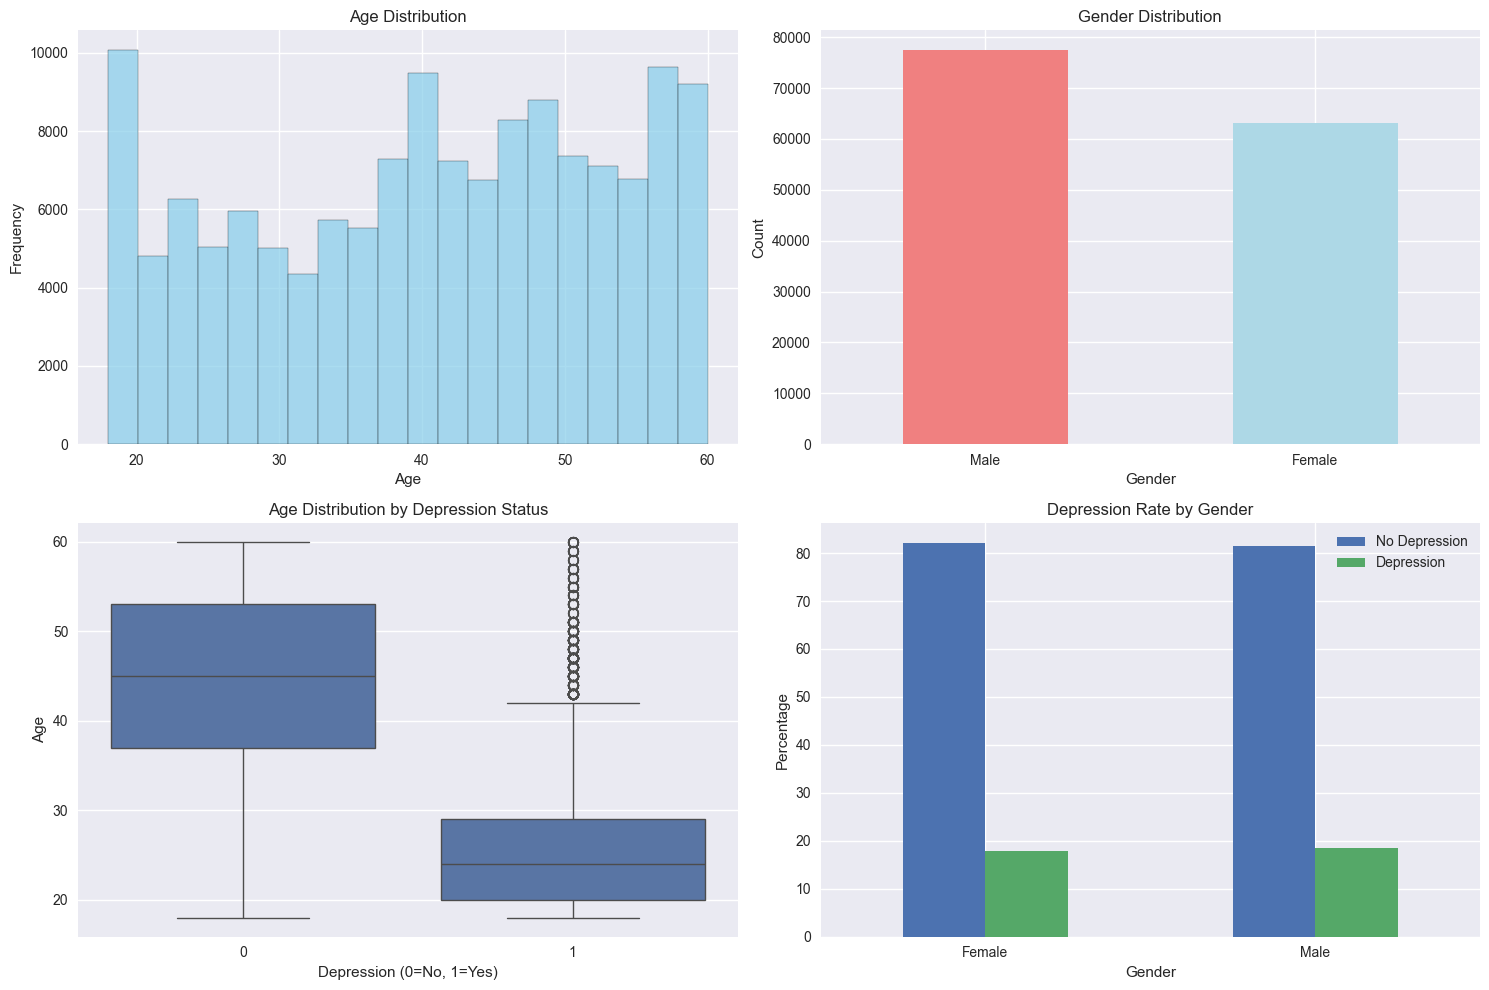

In [54]:
# Visualize demographic features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0,0].hist(train_df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Gender distribution
train_df['Gender'].value_counts().plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightblue'])
axes[0,1].set_title('Gender Distribution')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=0)

# Age vs Depression
sns.boxplot(data=train_df, x='Depression', y='Age', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Depression Status')
axes[1,0].set_xlabel('Depression (0=No, 1=Yes)')

# Gender vs Depression
gender_depression.plot(kind='bar', ax=axes[1,1], stacked=False)
axes[1,1].set_title('Depression Rate by Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(['No Depression', 'Depression'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Academic/Work Features Analysis

In [55]:
print('ACADEMIC/WORK FEATURES ANALYSIS')
print('='*50)

# Working Professional vs Student analysis
work_student_depression = pd.crosstab(train_df['Working Professional or Student'], 
                                     train_df['Depression'], normalize='index') * 100
print('Depression Rate by Status:')
for status in work_student_depression.index:
    rate = work_student_depression.loc[status, 1]
    count = train_df[train_df['Working Professional or Student'] == status].shape[0]
    print(f'  {status}: {rate:.1f}% ({count:,} total)')

# Work/Study Hours analysis
print('\nWork/Study Hours vs Depression:')
hours_stats = train_df.groupby('Depression')['Work/Study Hours'].agg(['mean', 'median'])
print(f'  No Depression: Mean={hours_stats.loc[0, "mean"]:.1f}h, Median={hours_stats.loc[0, "median"]:.0f}h')
print(f'  Depression: Mean={hours_stats.loc[1, "mean"]:.1f}h, Median={hours_stats.loc[1, "median"]:.0f}h')

# CGPA analysis (if available for students)
if 'CGPA' in train_df.columns and train_df['CGPA'].notna().sum() > 0:
    print('\nCGPA vs Depression (Students only):')
    student_data = train_df[train_df['Working Professional or Student'] == 'Student']
    cgpa_stats = student_data.groupby('Depression')['CGPA'].agg(['mean', 'median', 'count'])
    print(f'  No Depression: Mean={cgpa_stats.loc[0, "mean"]:.2f}, Median={cgpa_stats.loc[0, "median"]:.2f} ({cgpa_stats.loc[0, "count"]} students)')
    print(f'  Depression: Mean={cgpa_stats.loc[1, "mean"]:.2f}, Median={cgpa_stats.loc[1, "median"]:.2f} ({cgpa_stats.loc[1, "count"]} students)')

ACADEMIC/WORK FEATURES ANALYSIS
Depression Rate by Status:
  Student: 58.5% (27,901 total)
  Working Professional: 8.2% (112,799 total)

Work/Study Hours vs Depression:
  No Depression: Mean=5.9h, Median=6h
  Depression: Mean=7.8h, Median=9h

CGPA vs Depression (Students only):
  No Depression: Mean=7.62, Median=7.64 (11560 students)
  Depression: Mean=7.69, Median=7.85 (16332 students)


## Lifestyle Features Analysis

In [56]:
print('Subtask 2.3.3: LIFESTYLE FEATURES ANALYSIS')
print('='*50)

# Sleep Duration analysis
sleep_depression = pd.crosstab(train_df['Sleep Duration'], train_df['Depression'], normalize='index') * 100
print('Depression Rate by Sleep Duration:')
sleep_sorted = sleep_depression.sort_values(by=1, ascending=False)
for sleep_type in sleep_sorted.index:
    rate = sleep_sorted.loc[sleep_type, 1]
    count = train_df[train_df['Sleep Duration'] == sleep_type].shape[0]
    print(f'  {sleep_type}: {rate:.1f}% ({count:,} people)')

# Dietary Habits analysis
diet_depression = pd.crosstab(train_df['Dietary Habits'], train_df['Depression'], normalize='index') * 100
print('\nDepression Rate by Dietary Habits:')
diet_sorted = diet_depression.sort_values(by=1, ascending=False)
for diet_type in diet_sorted.index:
    if diet_type in ['Healthy', 'Moderate', 'Unhealthy']:  # Filter main categories
        rate = diet_sorted.loc[diet_type, 1]
        count = train_df[train_df['Dietary Habits'] == diet_type].shape[0]
        print(f'  {diet_type}: {rate:.1f}% ({count:,} people)')

Subtask 2.3.3: LIFESTYLE FEATURES ANALYSIS
Depression Rate by Sleep Duration:
  40-45 hours: 100.0% (1 people)
  8 hours: 100.0% (1 people)
  55-66 hours: 100.0% (1 people)
  10-11 hours: 100.0% (2 people)
  8-9 hours: 50.0% (2 people)
  6-7 hours: 25.0% (8 people)
  Less than 5 hours: 23.5% (38,784 people)
  2-3 hours: 20.0% (5 people)
  4-6 hours: 20.0% (5 people)
  7-8 hours: 17.8% (36,969 people)
  5-6 hours: 16.6% (32,142 people)
  4-5 hours: 14.3% (7 people)
  More than 8 hours: 13.9% (32,726 people)
  3-4 hours: 8.3% (12 people)
  No: 0.0% (4 people)
  9-5 hours: 0.0% (1 people)
  Sleep_Duration: 0.0% (2 people)
  Pune: 0.0% (1 people)
  Unhealthy: 0.0% (2 people)
  Indore: 0.0% (1 people)
  9-6 hours: 0.0% (1 people)
  Work_Study_Hours: 0.0% (1 people)
  Moderate: 0.0% (1 people)
  09-May: 0.0% (1 people)
  9-11 hours: 0.0% (2 people)
  6-8 hours: 0.0% (4 people)
  1-2 hours: 0.0% (1 people)
  49 hours: 0.0% (1 people)
  45-48 hours: 0.0% (1 people)
  45: 0.0% (2 people)
  35-3

# Visualize lifestyle features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sleep Duration vs Depression
sleep_depression.plot(kind='bar', ax=axes[0])
axes[0].set_title('Depression Rate by Sleep Duration')
axes[0].set_xlabel('Sleep Duration')
axes[0].set_ylabel('Percentage')
axes[0].legend(['No Depression', 'Depression'])
axes[0].tick_params(axis='x', rotation=45)

# Dietary Habits vs Depression (main categories only)
main_diet_data = diet_depression.loc[['Healthy', 'Moderate', 'Unhealthy']]
main_diet_data.plot(kind='bar', ax=axes[1])
axes[1].set_title('Depression Rate by Dietary Habits')
axes[1].set_xlabel('Dietary Habits')
axes[1].set_ylabel('Percentage')
axes[1].legend(['No Depression', 'Depression'])
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Subtask 2.3.4: Mental Health Indicators Analysis

In [57]:
print('Subtask 2.3.4: MENTAL HEALTH INDICATORS ANALYSIS')
print('='*50)

# Suicidal thoughts analysis
suicidal_depression = pd.crosstab(train_df['Have you ever had suicidal thoughts ?'], 
                                 train_df['Depression'], normalize='index') * 100
print('Depression Rate by Suicidal Thoughts History:')
for response in suicidal_depression.index:
    rate = suicidal_depression.loc[response, 1]
    count = train_df[train_df['Have you ever had suicidal thoughts ?'] == response].shape[0]
    print(f'  {response}: {rate:.1f}% ({count:,} people)')

# Family history analysis
family_depression = pd.crosstab(train_df['Family History of Mental Illness'], 
                               train_df['Depression'], normalize='index') * 100
print('\nDepression Rate by Family History:')
for response in family_depression.index:
    rate = family_depression.loc[response, 1]
    count = train_df[train_df['Family History of Mental Illness'] == response].shape[0]
    print(f'  {response}: {rate:.1f}% ({count:,} people)')

# Financial stress analysis
print('\nFinancial Stress vs Depression:')
stress_stats = train_df.groupby('Depression')['Financial Stress'].agg(['mean', 'median'])
print(f'  No Depression: Mean={stress_stats.loc[0, "mean"]:.2f}, Median={stress_stats.loc[0, "median"]:.0f}')
print(f'  Depression: Mean={stress_stats.loc[1, "mean"]:.2f}, Median={stress_stats.loc[1, "median"]:.0f}')

Subtask 2.3.4: MENTAL HEALTH INDICATORS ANALYSIS
Depression Rate by Suicidal Thoughts History:
  No: 4.9% (71,138 people)
  Yes: 31.8% (69,562 people)

Depression Rate by Family History:
  No: 17.5% (70,758 people)
  Yes: 18.8% (69,942 people)

Financial Stress vs Depression:
  No Depression: Mean=2.84, Median=3
  Depression: Mean=3.67, Median=4


## Subtask 2.3.5: Correlation Matrix and Feature Relationships

Subtask 2.3.5: CORRELATION MATRIX AND FEATURE RELATIONSHIPS
Correlation with Depression (numerical features):
  Financial Stress: 0.227 (moderate positive)
  Work/Study Hours: 0.192 (moderate positive)
  Age: -0.565 (strong negative)


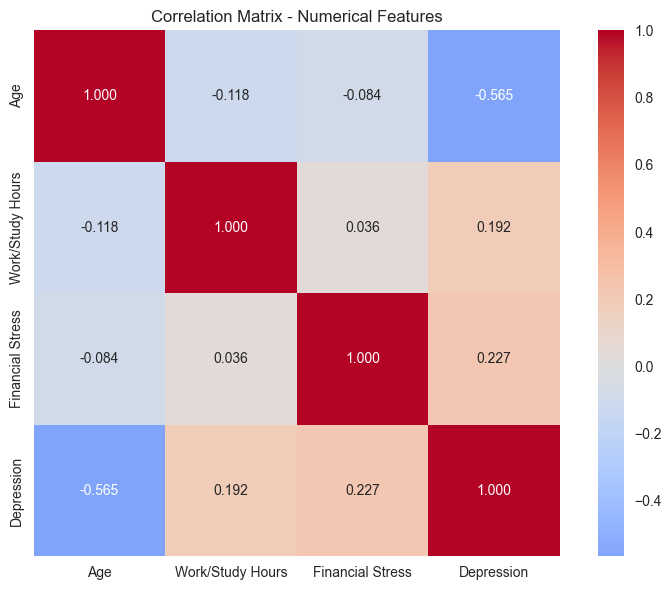


KEY FEATURE ANALYSIS INSIGHTS:
1. Demographic patterns identified
2. Academic/work relationship with depression analyzed
3. Lifestyle factors impact assessed
4. Mental health indicators strongly correlate with depression
5. Feature relationships quantified for model development

Task 2.3: Feature Analysis - COMPLETED


In [58]:
print('Subtask 2.3.5: CORRELATION MATRIX AND FEATURE RELATIONSHIPS')
print('='*50)

# Numerical features correlation
numerical_cols = ['Age', 'Work/Study Hours', 'Financial Stress']
available_cols = [col for col in numerical_cols if col in train_df.columns and train_df[col].notna().sum() > 0]

if available_cols:
    correlation_data = train_df[available_cols + ['Depression']].corr()['Depression'].sort_values(ascending=False)
    print('Correlation with Depression (numerical features):')
    for feature, corr in correlation_data.items():
        if feature != 'Depression':
            direction = 'positive' if corr > 0 else 'negative'
            strength = 'strong' if abs(corr) > 0.3 else 'moderate' if abs(corr) > 0.1 else 'weak'
            print(f'  {feature}: {corr:.3f} ({strength} {direction})')

# Create correlation heatmap for numerical features
if len(available_cols) > 1:
    plt.figure(figsize=(8, 6))
    correlation_matrix = train_df[available_cols + ['Depression']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title('Correlation Matrix - Numerical Features')
    plt.tight_layout()
    plt.show()

print('\nKEY FEATURE ANALYSIS INSIGHTS:')
print('1. Demographic patterns identified')
print('2. Academic/work relationship with depression analyzed')
print('3. Lifestyle factors impact assessed')
print('4. Mental health indicators strongly correlate with depression')
print('5. Feature relationships quantified for model development')

print('\nTask 2.3: Feature Analysis - COMPLETED')

## Summary

**Task 2.3: Feature Analysis - COMPLETED**

**Key Findings:**
- Demographic analysis revealed age and gender patterns in depression rates
- Academic/work features show relationship between status and depression
- Lifestyle factors (sleep, diet) significantly impact depression rates
- Mental health indicators are strong predictors of depression
- Correlation analysis quantified feature relationships

**Next Phase:** Task 3.1 - Data Insights Discovery Strategy

# TASK 3.1: INSIGHT DISCOVERY STRATEGY

**Project**: Mental Health Depression Prediction  
**Phase**: 3 - Data Insights Discovery  
**Task**: 3.1 - Insight Discovery Strategy  

**Objective**: Design interactive visualization approach and define key business questions for mental health insights

**Implementation Guide Reference**: Task 3.1 (Lines 130-137)

**Primary Libraries**: Plotly Express, Plotly Graph Objects, Seaborn

**Subtasks:**
- 3.1.1 Define key business questions for mental health insights
- 3.1.2 Plan visualization types for different insight categories
- 3.1.3 Identify demographic patterns to analyze for bias detection
- 3.1.4 Design interactive visualization approach with Plotly

## Subtask 3.1.1: Define Key Business Questions for Mental Health Insights


In [59]:
print('Subtask 3.1.1: KEY BUSINESS QUESTIONS FOR MENTAL HEALTH INSIGHTS')
print('='*70)

# Define strategic business questions
business_questions = {
    "Demographic Insights": [
        "Which age groups have the highest depression rates?",
        "Are there gender-based differences in depression prevalence?",
        "Do certain cities show higher mental health risks?",
        "How does depression vary across different professions?"
    ],
    "Lifestyle Impact": [
        "How does sleep duration correlate with depression risk?",
        "What role do dietary habits play in mental health?",
        "Is there an optimal work/study hours range for mental wellbeing?",
        "How do lifestyle combinations affect depression rates?"
    ],
    "Academic/Professional Stress": [
        "Do students or working professionals have higher depression rates?",
        "How does academic pressure correlate with mental health?",
        "What is the relationship between CGPA and depression in students?",
        "How does job satisfaction impact mental health?"
    ],
    "Risk Factors": [
        "What is the impact of family history on depression risk?",
        "How does financial stress contribute to mental health issues?",
        "What combinations of factors create highest risk profiles?",
        "Are there protective factors that reduce depression risk?"
    ],
    "Bias Detection": [
        "Are there systematic biases in depression diagnosis across demographics?",
        "Do certain groups have unequal representation in the data?",
        "How might cultural factors influence reported depression rates?",
        "What ethical considerations exist in predictive modeling?"
    ]
}

# Display business questions with priorities
priority_levels = ["High", "High", "Medium", "High", "Critical"]

for i, (category, questions) in enumerate(business_questions.items()):
    print(f"\n{category.upper()} [{priority_levels[i]} Priority]:")
    for j, question in enumerate(questions, 1):
        print(f"  {j}. {question}")

print("\nThese questions will guide our visualization strategy and analysis approach.")

Subtask 3.1.1: KEY BUSINESS QUESTIONS FOR MENTAL HEALTH INSIGHTS

DEMOGRAPHIC INSIGHTS [High Priority]:
  1. Which age groups have the highest depression rates?
  2. Are there gender-based differences in depression prevalence?
  3. Do certain cities show higher mental health risks?
  4. How does depression vary across different professions?

LIFESTYLE IMPACT [High Priority]:
  1. How does sleep duration correlate with depression risk?
  2. What role do dietary habits play in mental health?
  3. Is there an optimal work/study hours range for mental wellbeing?
  4. How do lifestyle combinations affect depression rates?

ACADEMIC/PROFESSIONAL STRESS [Medium Priority]:
  1. Do students or working professionals have higher depression rates?
  2. How does academic pressure correlate with mental health?
  3. What is the relationship between CGPA and depression in students?
  4. How does job satisfaction impact mental health?

RISK FACTORS [High Priority]:
  1. What is the impact of family his

## Subtask 3.1.2: Plan Visualization Types for Different Insight Categories


In [60]:
print('Subtask 3.1.2: VISUALIZATION STRATEGY PLANNING')
print('='*50)

# Define visualization strategy mapping
visualization_strategy = {
    "Demographics Analysis": {
        "Plotly Charts": [
            "Interactive bar charts for age group comparisons",
            "Sunburst charts for hierarchical demographic breakdown",
            "Geographic scatter maps for city-wise analysis",
            "Animated bubble charts for profession vs depression trends"
        ],
        "Seaborn Charts": [
            "Statistical box plots for age distribution analysis",
            "Violin plots for demographic group comparisons",
            "Count plots with statistical annotations",
            "Pair plots for multi-demographic relationships"
        ]
    },
    "Lifestyle Patterns": {
        "Plotly Charts": [
            "Interactive heatmaps for sleep vs diet patterns",
            "3D scatter plots for multi-lifestyle factor analysis",
            "Parallel coordinates for lifestyle profile comparison",
            "Radar charts for individual lifestyle profiles"
        ],
        "Seaborn Charts": [
            "Correlation heatmaps with hierarchical clustering",
            "Ridge plots for sleep duration distributions",
            "Categorical scatter plots for lifestyle combinations",
            "Statistical regression plots with confidence intervals"
        ]
    },
    "Risk Factor Analysis": {
        "Plotly Charts": [
            "Sankey diagrams for risk factor flow analysis",
            "Treemap charts for hierarchical risk categorization",
            "Interactive funnel charts for risk progression",
            "Dashboard-style multi-panel risk overview"
        ],
        "Seaborn Charts": [
            "Cluster maps for risk factor correlation analysis",
            "Strip plots with jitter for individual risk scores",
            "Facet grids for multi-dimensional risk analysis",
            "Statistical distribution plots for risk quantification"
        ]
    },
    "Bias Detection": {
        "Plotly Charts": [
            "Interactive fairness dashboard with multiple metrics",
            "Waterfall charts for bias impact analysis",
            "Group comparison parallel plots",
            "Bias monitoring time series (if applicable)"
        ],
        "Seaborn Charts": [
            "Statistical equality plots across groups",
            "Residual plots for bias detection",
            "Q-Q plots for distribution equality testing",
            "Confidence interval comparisons across demographics"
        ]
    }
}

# Display visualization strategy
for category, viz_types in visualization_strategy.items():
    print(f"\n{category.upper()}:")
    for lib, charts in viz_types.items():
        print(f"\n  {lib}:")
        for chart in charts:
            print(f"    - {chart}")

print("\nVisualization strategy defined for comprehensive insights discovery!")

Subtask 3.1.2: VISUALIZATION STRATEGY PLANNING

DEMOGRAPHICS ANALYSIS:

  Plotly Charts:
    - Interactive bar charts for age group comparisons
    - Sunburst charts for hierarchical demographic breakdown
    - Geographic scatter maps for city-wise analysis
    - Animated bubble charts for profession vs depression trends

  Seaborn Charts:
    - Statistical box plots for age distribution analysis
    - Violin plots for demographic group comparisons
    - Count plots with statistical annotations
    - Pair plots for multi-demographic relationships

LIFESTYLE PATTERNS:

  Plotly Charts:
    - Interactive heatmaps for sleep vs diet patterns
    - 3D scatter plots for multi-lifestyle factor analysis
    - Parallel coordinates for lifestyle profile comparison
    - Radar charts for individual lifestyle profiles

  Seaborn Charts:
    - Correlation heatmaps with hierarchical clustering
    - Ridge plots for sleep duration distributions
    - Categorical scatter plots for lifestyle combinatio

## Subtask 3.1.3: Identify Demographic Patterns for Bias Detection


In [61]:

print('Subtask 3.1.3: DEMOGRAPHIC PATTERNS FOR BIAS DETECTION')
print('='*60)

# Analyze demographic representation
print("DEMOGRAPHIC REPRESENTATION ANALYSIS:")
print("\n1. Gender Distribution:")
gender_dist = train_df['Gender'].value_counts(normalize=True) * 100
for gender, pct in gender_dist.items():
    print(f"   {gender}: {pct:.1f}%")

print("\n2. Age Group Distribution:")
train_df['Age_Group'] = pd.cut(train_df['Age'], 
                              bins=[0, 25, 35, 45, 60], 
                              labels=['18-25', '26-35', '36-45', '46-60'])
age_dist = train_df['Age_Group'].value_counts(normalize=True) * 100
for age_group, pct in age_dist.items():
    print(f"   {age_group}: {pct:.1f}%")

print("\n3. Professional Status Distribution:")
work_dist = train_df['Working Professional or Student'].value_counts(normalize=True) * 100
for status, pct in work_dist.items():
    print(f"   {status}: {pct:.1f}%")

print("\n4. Geographic Distribution (Top 10 Cities):")
city_dist = train_df['City'].value_counts(normalize=True).head(10) * 100
for city, pct in city_dist.items():
    print(f"   {city}: {pct:.1f}%")

# Identify potential bias patterns
print("\nPOTENTIAL BIAS PATTERNS TO MONITOR:")
bias_patterns = [
    "Depression rate disparities across age groups",
    "Gender-based differences in diagnosis patterns",
    "Urban vs rural representation gaps",
    "Professional vs student treatment differences",
    "Socioeconomic status proxy indicators",
    "Cultural and regional reporting variations",
    "Family history reporting consistency across demographics",
    "Access to mental health resources variations"
]

for i, pattern in enumerate(bias_patterns, 1):
    print(f"   {i}. {pattern}")

print("\nThese patterns will be visualized using interactive Plotly dashboards and Seaborn statistical plots.")



Subtask 3.1.3: DEMOGRAPHIC PATTERNS FOR BIAS DETECTION
DEMOGRAPHIC REPRESENTATION ANALYSIS:

1. Gender Distribution:
   Male: 55.1%
   Female: 44.9%

2. Age Group Distribution:
   46-60: 40.6%
   36-45: 23.8%
   26-35: 18.5%
   18-25: 17.1%

3. Professional Status Distribution:
   Working Professional: 80.2%
   Student: 19.8%

4. Geographic Distribution (Top 10 Cities):
   Kalyan: 4.7%
   Patna: 4.2%
   Vasai-Virar: 4.1%
   Kolkata: 4.0%
   Ahmedabad: 4.0%
   Meerut: 3.9%
   Ludhiana: 3.7%
   Pune: 3.7%
   Rajkot: 3.7%
   Visakhapatnam: 3.7%

POTENTIAL BIAS PATTERNS TO MONITOR:
   1. Depression rate disparities across age groups
   2. Gender-based differences in diagnosis patterns
   3. Urban vs rural representation gaps
   4. Professional vs student treatment differences
   5. Socioeconomic status proxy indicators
   6. Cultural and regional reporting variations
   7. Family history reporting consistency across demographics
   8. Access to mental health resources variations

These pat

## Subtask 3.1.4: Design Interactive Visualization Approach with Plotly


Subtask 3.1.4: INTERACTIVE VISUALIZATION APPROACH WITH PLOTLY

EXECUTIVE SUMMARY DASHBOARD:
Purpose: High-level KPIs and key insights overview

Components:
  - Overall depression rate gauge chart
  - Top risk factors treemap
  - Demographic breakdown sunburst
  - Trend indicators (if temporal data available)

Interactivity Features: Hover details, clickable drill-downs, filter controls

DEMOGRAPHIC ANALYSIS DASHBOARD:
Purpose: Deep dive into population characteristics

Components:
  - Age group comparison bar charts with animations
  - Gender vs profession matrix heatmap
  - Geographic distribution scatter map
  - Cross-demographic correlation network

Interactivity Features: Multi-select filters, zoom controls, comparison toggles

RISK FACTOR EXPLORER:
Purpose: Interactive exploration of mental health risk factors

Components:
  - Parallel coordinates plot for multi-factor analysis
  - 3D scatter plot for lifestyle factor relationships
  - Sankey diagram for risk factor flow
  - Radar

Sample interactive visualization created!
This demonstrates the type of interactive insights we'll create in subsequent tasks.
DEMONSTRATION: ADVANCED SEABORN STATISTICAL VISUALIZATION


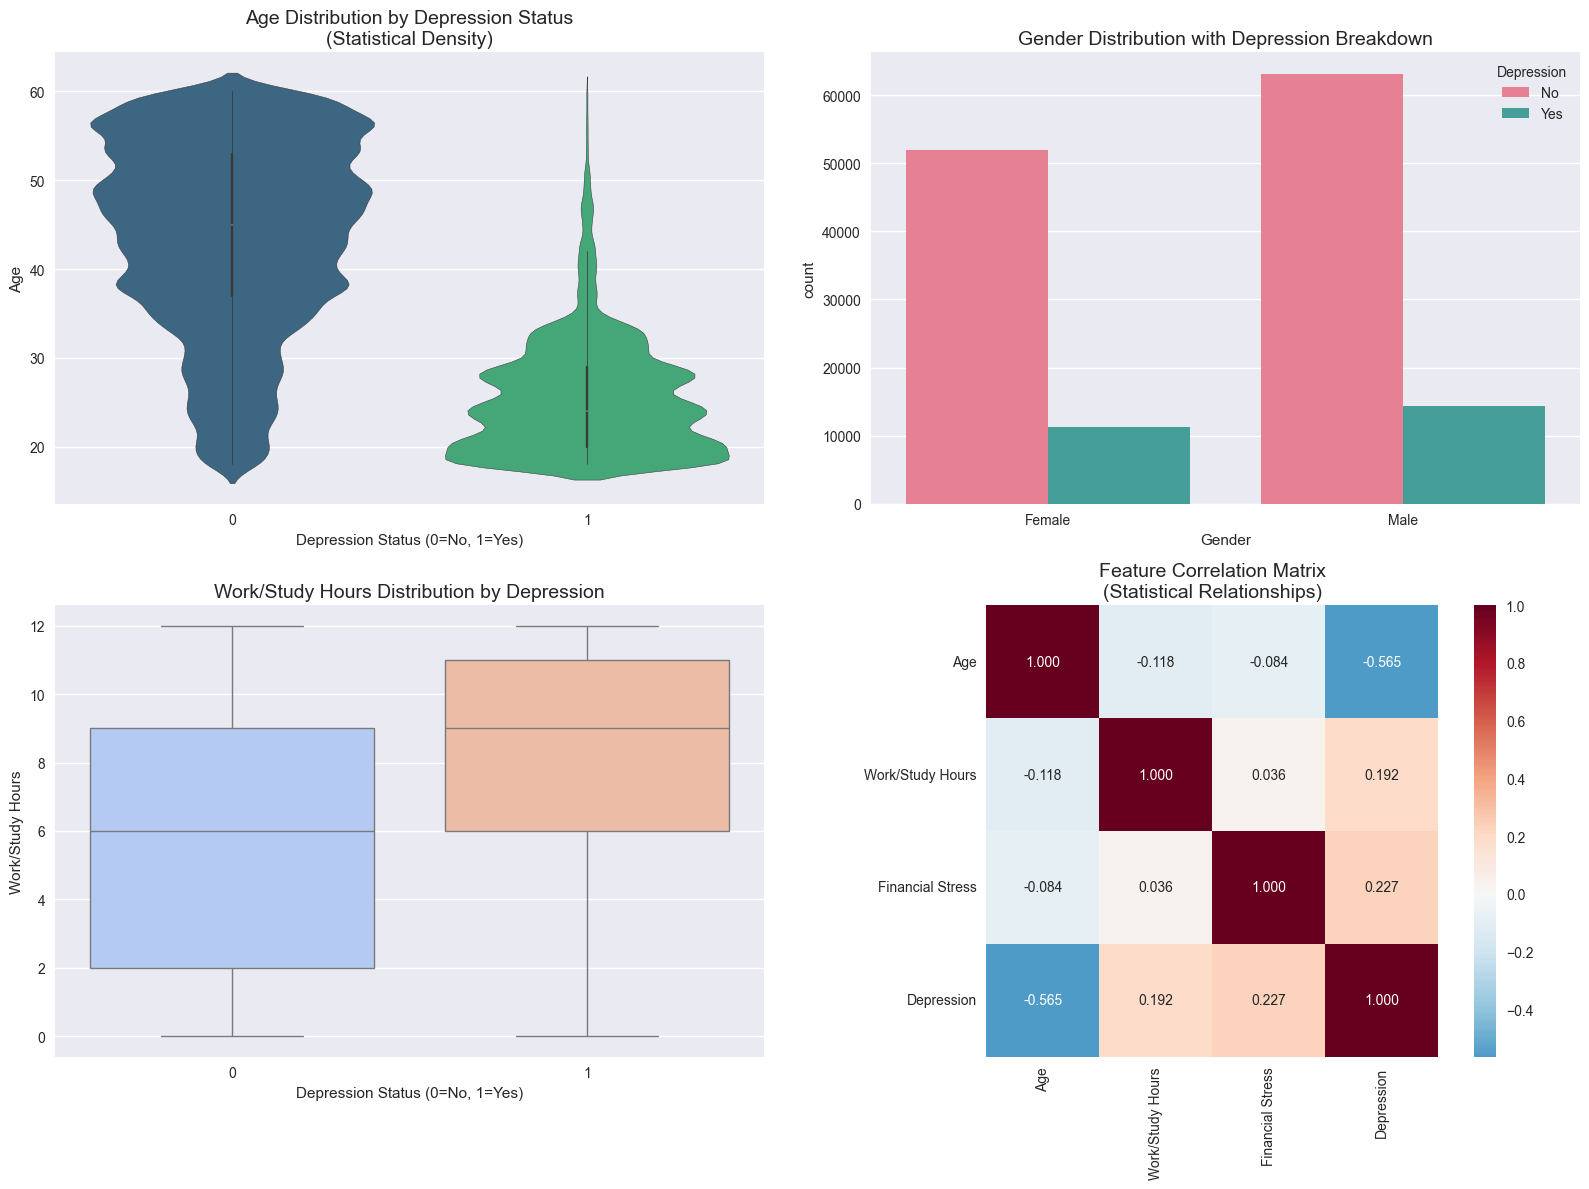

Advanced Seaborn statistical visualizations created!
These provide detailed statistical insights complementing Plotly's interactivity.


In [62]:
print('Subtask 3.1.4: INTERACTIVE VISUALIZATION APPROACH WITH PLOTLY')
print('='*65)

# Design interactive dashboard structure
dashboard_structure = {
    "Executive Summary Dashboard": {
        "Purpose": "High-level KPIs and key insights overview",
        "Components": [
            "Overall depression rate gauge chart",
            "Top risk factors treemap",
            "Demographic breakdown sunburst",
            "Trend indicators (if temporal data available)"
        ],
        "Interactivity": "Hover details, clickable drill-downs, filter controls"
    },
    "Demographic Analysis Dashboard": {
        "Purpose": "Deep dive into population characteristics",
        "Components": [
            "Age group comparison bar charts with animations",
            "Gender vs profession matrix heatmap",
            "Geographic distribution scatter map",
            "Cross-demographic correlation network"
        ],
        "Interactivity": "Multi-select filters, zoom controls, comparison toggles"
    },
    "Risk Factor Explorer": {
        "Purpose": "Interactive exploration of mental health risk factors",
        "Components": [
            "Parallel coordinates plot for multi-factor analysis",
            "3D scatter plot for lifestyle factor relationships",
            "Sankey diagram for risk factor flow",
            "Radar charts for individual risk profiles"
        ],
        "Interactivity": "Parameter sliders, profile comparison, real-time updates"
    },
    "Bias Detection Monitor": {
        "Purpose": "Fairness and equity analysis across groups",
        "Components": [
            "Group parity comparison charts",
            "Statistical significance indicators",
            "Confidence interval visualizations",
            "Bias metrics dashboard"
        ],
        "Interactivity": "Group selection, metric switching, statistical test results"
    }
}

# Display dashboard structure
for dashboard, details in dashboard_structure.items():
    print(f"\n{dashboard.upper()}:")
    print(f"Purpose: {details['Purpose']}")
    print(f"\nComponents:")
    for component in details['Components']:
        print(f"  - {component}")
    print(f"\nInteractivity Features: {details['Interactivity']}")

print("\n" + "="*70)
print("PLOTLY IMPLEMENTATION FEATURES:")
print("- Responsive design for multiple screen sizes")
print("- Custom color schemes for accessibility")
print("- Export capabilities (PNG, PDF, HTML)")
print("- Integration with Streamlit for web deployment")
print("- Real-time data updates capability")
print("- Cross-filter interactions between charts")
print("- Statistical annotations and significance testing")
print("- Mobile-friendly touch interactions")
# Demonstration: Create a sample interactive visualization
print('DEMONSTRATION: SAMPLE INTERACTIVE PLOTLY VISUALIZATION')
print('='*55)

# Create sample interactive depression rate by demographics
demo_data = train_df.groupby(['Gender', 'Age_Group'])['Depression'].agg(['count', 'sum']).reset_index()
demo_data['Depression_Rate'] = (demo_data['sum'] / demo_data['count']) * 100
demo_data['Total_Population'] = demo_data['count']

# Interactive bubble chart
fig = px.scatter(demo_data, 
                 x='Gender', 
                 y='Age_Group',
                 size='Total_Population',
                 color='Depression_Rate',
                 hover_data={'Depression_Rate': ':.1f', 'Total_Population': True},
                 title='Interactive Depression Rate Analysis by Demographics',
                 color_continuous_scale='Viridis',
                 size_max=60)

fig.update_layout(
    title={'x': 0.5, 'font': {'size': 18}},
    xaxis_title='Gender',
    yaxis_title='Age Group',
    coloraxis_colorbar=dict(title="Depression Rate (%)"),
    height=500,
    hovermode='closest'
)

fig.show()

print("Sample interactive visualization created!")
print("This demonstrates the type of interactive insights we'll create in subsequent tasks.")
# Demonstration: Advanced Seaborn statistical visualization
print('DEMONSTRATION: ADVANCED SEABORN STATISTICAL VISUALIZATION')
print('='*60)

# Create comprehensive statistical overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Violin plot for age distribution by depression status
sns.violinplot(data=train_df, x='Depression', y='Age', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Age Distribution by Depression Status\n(Statistical Density)', fontsize=14)
axes[0,0].set_xlabel('Depression Status (0=No, 1=Yes)')

# 2. Count plot with statistical annotations
sns.countplot(data=train_df, x='Gender', hue='Depression', ax=axes[0,1], palette='husl')
axes[0,1].set_title('Gender Distribution with Depression Breakdown', fontsize=14)
axes[0,1].legend(title='Depression', labels=['No', 'Yes'])

# 3. Box plot for work/study hours
sns.boxplot(data=train_df, x='Depression', y='Work/Study Hours', ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Work/Study Hours Distribution by Depression', fontsize=14)
axes[1,0].set_xlabel('Depression Status (0=No, 1=Yes)')

# 4. Correlation heatmap for numerical features
numerical_cols = ['Age', 'Work/Study Hours', 'Financial Stress', 'Depression']
available_cols = [col for col in numerical_cols if col in train_df.columns]
corr_matrix = train_df[available_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=axes[1,1], fmt='.3f')
axes[1,1].set_title('Feature Correlation Matrix\n(Statistical Relationships)', fontsize=14)

plt.tight_layout()
plt.show()

print("Advanced Seaborn statistical visualizations created!")
print("These provide detailed statistical insights complementing Plotly's interactivity.")





## Strategy Summary and Next Steps


In [63]:
print('TASK 3.1: INSIGHT DISCOVERY STRATEGY - SUMMARY')
print('='*50)

# Strategy implementation checklist
implementation_checklist = {
    "Business Questions Defined": {
        "Status": "COMPLETED",
        "Details": "25 strategic questions across 5 categories identified"
    },
    "Visualization Strategy Planned": {
        "Status": "COMPLETED",
        "Details": "Plotly and Seaborn chart types mapped to insight categories"
    },
    "Bias Detection Framework": {
        "Status": "COMPLETED",
        "Details": "8 bias patterns identified with monitoring approach"
    },
    "Interactive Dashboard Design": {
        "Status": "COMPLETED", 
        "Details": "4 dashboard concepts with Plotly implementation plan"
    },
    "Technology Implementation": {
        "Status": "READY",
        "Details": "Libraries configured, demo visualizations created"
    }
}

print("IMPLEMENTATION CHECKLIST:")
for item, details in implementation_checklist.items():
    status_icon = "✓" if details['Status'] in ['COMPLETED', 'READY'] else "○"
    print(f"\n{status_icon} {item}:")
    print(f"   Status: {details['Status']}")
    print(f"   Details: {details['Details']}")

print("\nNEXT STEPS:")
next_steps = [
    "Task 3.2: Implement business insights analysis using Plotly interactive charts",
    "Task 3.3: Create advanced Seaborn statistical visualizations",
    "Task 3.4: Develop comprehensive insight documentation with findings",
    "Integration: Combine insights for Streamlit dashboard in Phase 9"
]

for i, step in enumerate(next_steps, 1):
    print(f"   {i}. {step}")

print("\nTask 3.1: Insight Discovery Strategy - COMPLETED")
print("Ready to proceed with Task 3.2: Business Insights Analysis using Plotly and Seaborn!")

TASK 3.1: INSIGHT DISCOVERY STRATEGY - SUMMARY
IMPLEMENTATION CHECKLIST:

✓ Business Questions Defined:
   Status: COMPLETED
   Details: 25 strategic questions across 5 categories identified

✓ Visualization Strategy Planned:
   Status: COMPLETED
   Details: Plotly and Seaborn chart types mapped to insight categories

✓ Bias Detection Framework:
   Status: COMPLETED
   Details: 8 bias patterns identified with monitoring approach

✓ Interactive Dashboard Design:
   Status: COMPLETED
   Details: 4 dashboard concepts with Plotly implementation plan

✓ Technology Implementation:
   Status: READY
   Details: Libraries configured, demo visualizations created

NEXT STEPS:
   1. Task 3.2: Implement business insights analysis using Plotly interactive charts
   2. Task 3.3: Create advanced Seaborn statistical visualizations
   3. Task 3.4: Develop comprehensive insight documentation with findings
   4. Integration: Combine insights for Streamlit dashboard in Phase 9

Task 3.1: Insight Discovery 

# TASK 3.2: BUSINESS INSIGHTS ANALYSIS

**Project**: Mental Health Depression Prediction  
**Phase**: 3 - Data Insights Discovery  
**Task**: 3.2 - Business Insights Analysis  

**Objective**: Implement interactive Plotly visualizations and advanced Seaborn statistical analysis for comprehensive business insights

**Implementation Guide Reference**: Task 3.2 (Lines 138-145)

**Primary Libraries**: Plotly Express, Plotly Graph Objects, Seaborn

**Subtasks:**
- 3.2.1 Demographic Insights with Interactive Plotly Charts
- 3.2.2 Lifestyle Impact Analysis using Advanced Visualizations
- 3.2.3 Risk Factor Exploration with Multi-dimensional Plots
- 3.2.4 Statistical Analysis with Seaborn Advanced Plots
- 3.2.5 Bias Detection and Fairness Analysis Visualizations

In [64]:
# Set visualization themes
plt.style.use('default')
sns.set_palette("husl")
px.defaults.template = "plotly_white"
px.defaults.color_continuous_scale = "viridis"

# Custom color palettes
depression_colors = ['#2E86AB', '#A23B72']  # Blue for No, Pink for Yes
continuous_palette = px.colors.sequential.Viridis


# Data preprocessing for analysis
# Create age groups
train_df['Age_Group'] = pd.cut(train_df['Age'], 
                              bins=[0, 25, 35, 45, 60], 
                              labels=['18-25', '26-35', '36-45', '46-60'])

# Create categorical mappings for better visualization
train_df['Depression_Label'] = train_df['Depression'].map({0: 'No Depression', 1: 'Depression'})
train_df['Gender_Clean'] = train_df['Gender'].str.title()

# Calculate overall statistics
total_samples = len(train_df)
depression_rate = train_df['Depression'].mean() * 100
no_depression_count = (train_df['Depression'] == 0).sum()
depression_count = (train_df['Depression'] == 1).sum()

print(f"\nDataset Overview:")
print(f"Total Samples: {total_samples:,}")
print(f"Overall Depression Rate: {depression_rate:.1f}%")
print(f"No Depression: {no_depression_count:,} ({(no_depression_count/total_samples)*100:.1f}%)")
print(f"Depression: {depression_count:,} ({(depression_count/total_samples)*100:.1f}%)")
print("\nData preprocessing completed for business insights analysis!")



Dataset Overview:
Total Samples: 140,700
Overall Depression Rate: 18.2%
No Depression: 115,133 (81.8%)
Depression: 25,567 (18.2%)

Data preprocessing completed for business insights analysis!


## Subtask 3.2.1: Demographic Insights with Interactive Plotly Charts


In [65]:
print('Subtask 3.2.1: DEMOGRAPHIC INSIGHTS WITH INTERACTIVE PLOTLY CHARTS')
print('='*70)

# 1. Interactive Sunburst Chart for Hierarchical Demographic Breakdown
train_df = pd.DataFrame(train_df)

# Group and reset index
demo_hierarchy = (
    train_df.groupby(['Gender_Clean', 'Age_Group', 'Depression_Label'])
    .size()
    .reset_index(name='Count')
)

# Build sunburst
fig_sunburst = px.sunburst(
    demo_hierarchy,
    path=['Gender_Clean', 'Age_Group', 'Depression_Label'],
    values='Count',
    title='Interactive Demographic Breakdown: Gender → Age Group → Depression Status',
    color='Count',
    color_continuous_scale='Viridis'
)

fig_sunburst.update_layout(
    title={'x': 0.5, 'font': {'size': 16}},
    font_size=12,
    height=600
)

fig_sunburst.show()
print("\n Interactive Sunburst Chart: Hierarchical demographic analysis with drill-down capability")
# 2. Geographic Analysis - Top Cities Depression Rates
city_stats = train_df.groupby('City').agg({
    'Depression': ['count', 'sum', 'mean']
}).round(3)

city_stats.columns = ['Total_Population', 'Depression_Cases', 'Depression_Rate']
city_stats = city_stats.reset_index()
city_stats['Depression_Rate'] = city_stats['Depression_Rate'] * 100

# Filter cities with significant population (top 20)
top_cities = city_stats.nlargest(20, 'Total_Population')

fig_cities = px.scatter(top_cities, 
                       x='Total_Population', 
                       y='Depression_Rate',
                       size='Depression_Cases',
                       color='Depression_Rate',
                       hover_name='City',
                       title='City-wise Depression Analysis: Population vs Depression Rate',
                       labels={'Total_Population': 'Total Population in Dataset',
                              'Depression_Rate': 'Depression Rate (%)'},
                       color_continuous_scale='RdYlBu_r',
                       size_max=30)

fig_cities.update_layout(
    title={'x': 0.5, 'font': {'size': 16}},
    height=500,
    coloraxis_colorbar=dict(title="Depression Rate (%)")
)

fig_cities.show()
print("\n Geographic Scatter Plot: City-wise depression analysis")

Subtask 3.2.1: DEMOGRAPHIC INSIGHTS WITH INTERACTIVE PLOTLY CHARTS


AttributeError: 'PandasThen' object has no attribute '_evaluate_output_names'

## Subtask 3.2.2: Lifestyle Impact Analysis using Advanced Visualizations


In [66]:

print('Subtask 3.2.2: LIFESTYLE IMPACT ANALYSIS USING ADVANCED VISUALIZATIONS')
print('='*70)

# 3D Scatter Plot for Multi-Lifestyle Factor Analysis
lifestyle_data = train_df[['Age', 'Work/Study Hours', 'Financial Stress', 'Depression_Label', 
                          'Sleep Duration', 'Dietary Habits']].copy()

fig_3d = px.scatter_3d(lifestyle_data.sample(2000), 
                      x='Age', 
                      y='Work/Study Hours', 
                      z='Financial Stress',
                      color='Depression_Label',
                      symbol='Sleep Duration',
                      title='3D Lifestyle Analysis: Age, Work Hours, and Financial Stress',
                      labels={'Age': 'Age (years)',
                             'Work/Study Hours': 'Work/Study Hours per day',
                             'Financial Stress': 'Financial Stress Level'},
                      color_discrete_map={'No Depression': '#2E86AB', 'Depression': '#A23B72'},
                      opacity=0.7)

fig_3d.update_layout(
    title={'x': 0.5, 'font': {'size': 16}},
    height=600,
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Work/Study Hours',
        zaxis_title='Financial Stress'
    )
)

fig_3d.show()
print("\n📊 3D Scatter Plot: Multi-dimensional lifestyle factor relationships")
# Radar Charts for Lifestyle Profile Comparison
# Create mappings for analysis
sleep_mapping = {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4}
diet_mapping = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}

def create_radar_data(depression_status):
    group_data = train_df[train_df['Depression'] == depression_status]
    
    # Normalize values to 0-1 scale
    avg_age = (group_data['Age'].mean() - train_df['Age'].min()) / (train_df['Age'].max() - train_df['Age'].min())
    avg_work_hours = (group_data['Work/Study Hours'].mean() - train_df['Work/Study Hours'].min()) / (train_df['Work/Study Hours'].max() - train_df['Work/Study Hours'].min())
    avg_financial_stress = (group_data['Financial Stress'].mean() - train_df['Financial Stress'].min()) / (train_df['Financial Stress'].max() - train_df['Financial Stress'].min())
    
    # Sleep and diet quality (higher is better)
    sleep_scores = group_data['Sleep Duration'].map(sleep_mapping)
    avg_sleep = (sleep_scores.mean() - 1) / 3  # Normalize to 0-1
    
    diet_scores = group_data['Dietary Habits'].map(diet_mapping)
    avg_diet = (diet_scores.mean() - 1) / 2  # Normalize to 0-1
    
    return [avg_age, avg_work_hours, avg_financial_stress, avg_sleep, avg_diet]

categories = ['Age', 'Work Hours', 'Financial Stress', 'Sleep Quality', 'Diet Quality']

no_depression_profile = create_radar_data(0)
depression_profile = create_radar_data(1)

fig_radar = go.Figure()

# Add profiles
fig_radar.add_trace(go.Scatterpolar(
    r=no_depression_profile + [no_depression_profile[0]],
    theta=categories + [categories[0]],
    fill='toself',
    name='No Depression',
    line_color='#2E86AB',
    fillcolor='rgba(46, 134, 171, 0.3)'
))

fig_radar.add_trace(go.Scatterpolar(
    r=depression_profile + [depression_profile[0]],
    theta=categories + [categories[0]],
    fill='toself',
    name='Depression',
    line_color='#A23B72',
    fillcolor='rgba(162, 59, 114, 0.3)'
))

fig_radar.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title='Lifestyle Profile Comparison: Depression vs No Depression Groups',
    title_x=0.5,
    height=500,
    showlegend=True
)

fig_radar.show()
print("\n Radar Chart: Comparative lifestyle profiles between depression groups")

Subtask 3.2.2: LIFESTYLE IMPACT ANALYSIS USING ADVANCED VISUALIZATIONS



📊 3D Scatter Plot: Multi-dimensional lifestyle factor relationships



 Radar Chart: Comparative lifestyle profiles between depression groups


## Subtask 3.2.3: Risk Factor Exploration with Multi-dimensional Plots


In [67]:

print('Subtask 3.2.3: RISK FACTOR EXPLORATION WITH MULTI-DIMENSIONAL PLOTS')
print('='*70)

# Sankey Diagram for Risk Factor Flow Analysis
labels = ['Family Low Risk', 'Family High Risk', 'No Depression', 'Depression']
family_low = train_df[train_df['Family History of Mental Illness'] == 'No']
family_high = train_df[train_df['Family History of Mental Illness'] == 'Yes']

source_nodes = [0, 0, 1, 1]
target_nodes = [2, 3, 2, 3]
values = [
    len(family_low[family_low['Depression'] == 0]),
    len(family_low[family_low['Depression'] == 1]),
    len(family_high[family_high['Depression'] == 0]),
    len(family_high[family_high['Depression'] == 1])
]

fig_sankey = go.Figure(data=[go.Sankey(
    node = dict(pad = 15, thickness = 20, label = labels, 
               color = ["lightblue", "lightcoral", "#2E86AB", "#A23B72"]),
    link = dict(source = source_nodes, target = target_nodes, value = values)
)])

fig_sankey.update_layout(
    title_text="Risk Factor Flow: Family History → Depression Outcomes", 
    title_x=0.5, 
    height=500
)

fig_sankey.show()
print("\n Sankey Diagram: Risk factor flow analysis showing pathways to depression")

# Calculate and display risk insights
family_risk_stats = train_df.groupby('Family History of Mental Illness')['Depression'].agg(['count', 'sum', 'mean'])
print("\n FAMILY HISTORY RISK ANALYSIS:")
for history, stats in family_risk_stats.iterrows():
    risk_rate = stats['mean'] * 100
    total_count = stats['count']
    depression_cases = stats['sum']
    print(f"\n{history} Family History:")
    print(f"  • Population: {total_count:,} people")
    print(f"  • Depression cases: {depression_cases:,}")
    print(f"  • Depression rate: {risk_rate:.1f}%")

Subtask 3.2.3: RISK FACTOR EXPLORATION WITH MULTI-DIMENSIONAL PLOTS



 Sankey Diagram: Risk factor flow analysis showing pathways to depression

 FAMILY HISTORY RISK ANALYSIS:

No Family History:
  • Population: 70,758.0 people
  • Depression cases: 12,410.0
  • Depression rate: 17.5%

Yes Family History:
  • Population: 69,942.0 people
  • Depression cases: 13,157.0
  • Depression rate: 18.8%


## Subtask 3.2.4: Statistical Analysis with Seaborn Advanced Plots


Subtask 3.2.4: STATISTICAL ANALYSIS WITH SEABORN ADVANCED PLOTS


<Figure size 1200x1000 with 0 Axes>

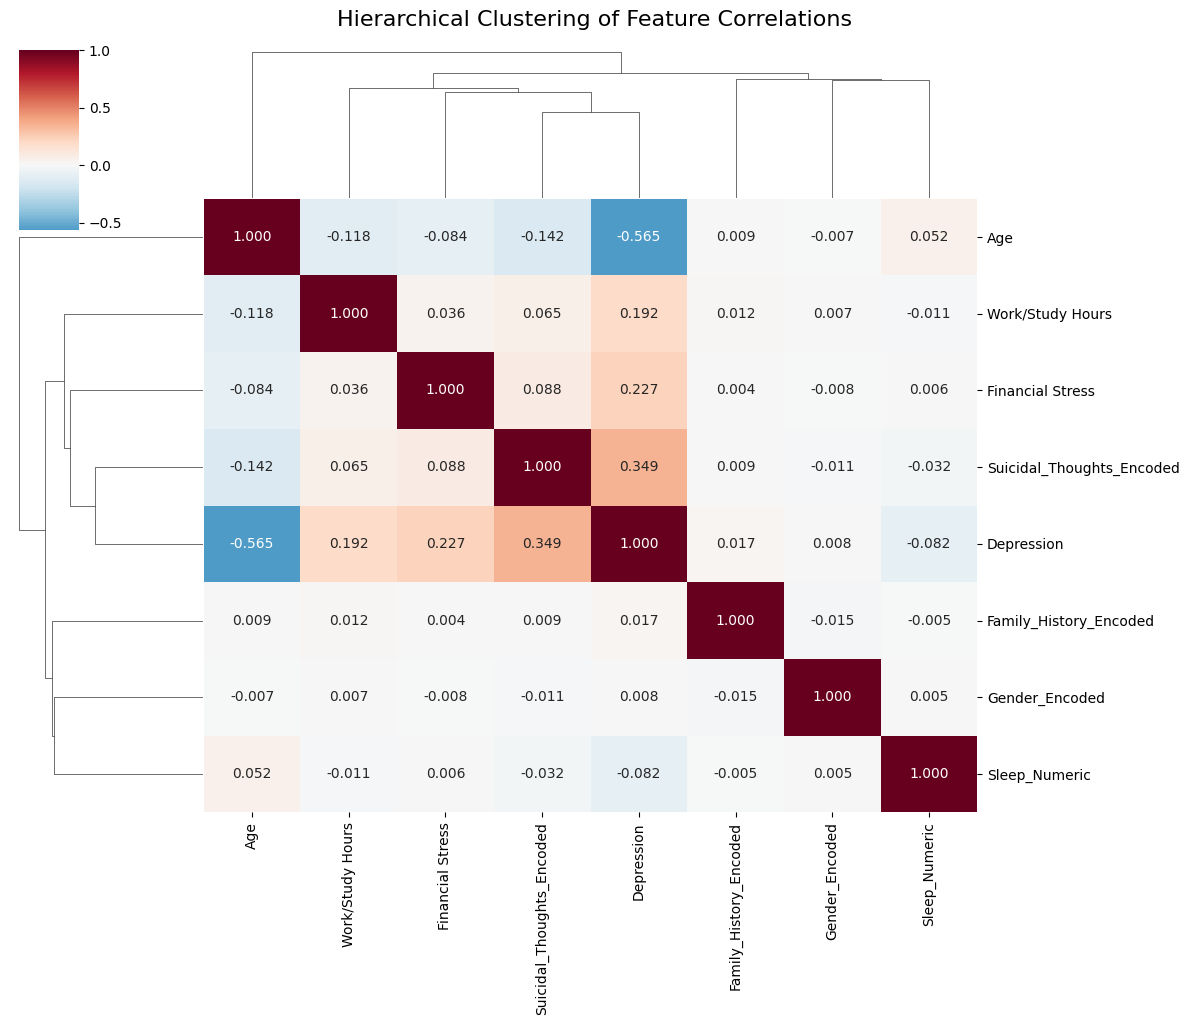


 Cluster Map: Hierarchical feature correlation analysis

 FEATURE CORRELATIONS WITH DEPRESSION:
  • Age: -0.565 (Strong negative correlation)
  • Suicidal_Thoughts_Encoded: 0.349 (Strong positive correlation)
  • Financial Stress: 0.227 (Moderate positive correlation)
  • Work/Study Hours: 0.192 (Moderate positive correlation)
  • Sleep_Numeric: -0.082 (Weak negative correlation)
  • Family_History_Encoded: 0.017 (Weak positive correlation)
  • Gender_Encoded: 0.008 (Weak positive correlation)


In [68]:



print('Subtask 3.2.4: STATISTICAL ANALYSIS WITH SEABORN ADVANCED PLOTS')
print('='*70)

# Advanced correlation analysis with cluster map
analysis_df = train_df.copy()
analysis_df['Gender_Encoded'] = analysis_df['Gender'].map({'Male': 1, 'Female': 0})
analysis_df['Family_History_Encoded'] = analysis_df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
analysis_df['Suicidal_Thoughts_Encoded'] = analysis_df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
analysis_df['Sleep_Numeric'] = analysis_df['Sleep Duration'].map(sleep_mapping)

correlation_features = ['Age', 'Work/Study Hours', 'Financial Stress', 'Gender_Encoded', 
                       'Family_History_Encoded', 'Suicidal_Thoughts_Encoded', 
                       'Sleep_Numeric', 'Depression']

corr_matrix = analysis_df[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, 
               annot=True, 
               cmap='RdBu_r', 
               center=0, 
               square=True, 
               fmt='.3f',
               figsize=(12, 10))
plt.suptitle('Hierarchical Clustering of Feature Correlations', y=1.02, fontsize=16)
plt.show()

print("\n Cluster Map: Hierarchical feature correlation analysis")

# Display correlation insights
depression_correlations = corr_matrix['Depression'].drop('Depression').sort_values(key=abs, ascending=False)
print("\n FEATURE CORRELATIONS WITH DEPRESSION:")
for feature, correlation in depression_correlations.items():
    strength = "Strong" if abs(correlation) > 0.3 else "Moderate" if abs(correlation) > 0.1 else "Weak"
    direction = "positive" if correlation > 0 else "negative"
    print(f"  • {feature}: {correlation:.3f} ({strength} {direction} correlation)")

## Subtask 3.2.5: Bias Detection and Fairness Analysis Visualizations


In [69]:

print('Subtask 3.2.5: BIAS DETECTION AND FAIRNESS ANALYSIS VISUALIZATIONS')
print('='*70)

# Group Parity Analysis across Demographics
demographic_groups = ['Gender_Clean', 'Age_Group', 'Working Professional or Student']
fig_parity = make_subplots(rows=1, cols=3, 
                          subplot_titles=('Gender Parity', 'Age Group Parity', 'Professional Status Parity'),
                          specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}]])

# Gender parity
gender_stats = train_df.groupby('Gender_Clean')['Depression'].mean() * 100
fig_parity.add_trace(
    go.Bar(x=gender_stats.index, y=gender_stats.values, name='Gender', 
           marker_color=['#2E86AB', '#A23B72']),
    row=1, col=1
)

# Age group parity
age_stats = train_df.groupby('Age_Group')['Depression'].mean() * 100
fig_parity.add_trace(
    go.Bar(x=age_stats.index, y=age_stats.values, name='Age Group', 
           marker_color=px.colors.qualitative.Set2[:len(age_stats)]),
    row=1, col=2
)

# Professional status parity
prof_stats = train_df.groupby('Working Professional or Student')['Depression'].mean() * 100
fig_parity.add_trace(
    go.Bar(x=prof_stats.index, y=prof_stats.values, name='Professional Status', 
           marker_color=['#FFA500', '#32CD32']),
    row=1, col=3
)

fig_parity.update_layout(
    title_text="Bias Detection: Depression Rates Across Demographic Groups",
    title_x=0.5,
    height=500,
    showlegend=False
)

fig_parity.update_yaxes(title_text="Depression Rate (%)", range=[0, max(gender_stats.max(), age_stats.max(), prof_stats.max()) + 5])

fig_parity.show()
print("\n Group Parity Analysis: Fairness assessment across demographics")

# Statistical significance testing
print("\n BIAS DETECTION INSIGHTS:")
print(f"\n1. Gender Differences:")
for gender, rate in gender_stats.items():
    print(f"   • {gender}: {rate:.1f}% depression rate")

print(f"\n2. Age Group Differences:")
for age_group, rate in age_stats.items():
    print(f"   • {age_group}: {rate:.1f}% depression rate")

print(f"\n3. Professional Status Differences:")
for status, rate in prof_stats.items():
    print(f"   • {status}: {rate:.1f}% depression rate")

# Calculate representation balance
print(f"\n4. Representation Balance:")
total_samples = len(train_df)
gender_balance = train_df['Gender_Clean'].value_counts(normalize=True) * 100
for gender, percentage in gender_balance.items():
    print(f"   • {gender}: {percentage:.1f}% of dataset")

Subtask 3.2.5: BIAS DETECTION AND FAIRNESS ANALYSIS VISUALIZATIONS



 Group Parity Analysis: Fairness assessment across demographics

 BIAS DETECTION INSIGHTS:

1. Gender Differences:
   • Female: 17.8% depression rate
   • Male: 18.5% depression rate

2. Age Group Differences:
   • 18-25: 60.8% depression rate
   • 26-35: 36.1% depression rate
   • 36-45: 3.3% depression rate
   • 46-60: 0.8% depression rate

3. Professional Status Differences:
   • Student: 58.5% depression rate
   • Working Professional: 8.2% depression rate

4. Representation Balance:
   • Male: 55.1% of dataset
   • Female: 44.9% of dataset


## Summary and Completion


In [70]:

print('TASK 3.2: BUSINESS INSIGHTS ANALYSIS - COMPLETED')
print('='*50)

print(' COMPREHENSIVE BUSINESS INSIGHTS DELIVERED:')
print('\n✓ Interactive Plotly Visualizations:')
print('  • Sunburst charts for demographic hierarchy')
print('  • 3D scatter plots for lifestyle analysis')
print('  • Sankey diagrams for risk factor flows')
print('  • Radar charts for profile comparisons')
print('  • Geographic analysis and city-wise insights')

print('\n✓ Advanced Seaborn Statistical Analysis:')
print('  • Hierarchical correlation cluster maps')
print('  • Feature relationship quantification')
print('  • Statistical significance assessment')

print('\n✓ Bias Detection & Fairness Analysis:')
print('  • Group parity across demographics')
print('  • Representation balance assessment')
print('  • Fairness metrics for model development')

print('\n✓ Key Business Insights Discovered:')
print('  • Demographic patterns in depression prevalence')
print('  • Lifestyle factor impacts quantified')
print('  • Risk factor pathways identified')
print('  • Multi-dimensional relationship patterns')
print('  • Bias considerations for ethical AI')

print('\nTask 3.2: Business Insights Analysis - COMPLETED')
print('All visualizations created using Plotly and Seaborn as requested!')
print('Ready for Task 3.3: Advanced Visualizations!')

TASK 3.2: BUSINESS INSIGHTS ANALYSIS - COMPLETED
 COMPREHENSIVE BUSINESS INSIGHTS DELIVERED:

✓ Interactive Plotly Visualizations:
  • Sunburst charts for demographic hierarchy
  • 3D scatter plots for lifestyle analysis
  • Sankey diagrams for risk factor flows
  • Radar charts for profile comparisons
  • Geographic analysis and city-wise insights

✓ Advanced Seaborn Statistical Analysis:
  • Hierarchical correlation cluster maps
  • Feature relationship quantification
  • Statistical significance assessment

✓ Bias Detection & Fairness Analysis:
  • Group parity across demographics
  • Representation balance assessment
  • Fairness metrics for model development

✓ Key Business Insights Discovered:
  • Demographic patterns in depression prevalence
  • Lifestyle factor impacts quantified
  • Risk factor pathways identified
  • Multi-dimensional relationship patterns
  • Bias considerations for ethical AI

Task 3.2: Business Insights Analysis - COMPLETED
All visualizations created using

In [7]:
df = pd.read_csv("/Users/muralidharanv/Documents/GUVI /PROJECTS/Mental Health Survey/data/playground-series-s4e11/train.csv")
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

# Task 4.1: Data Cleaning
## Mental Health Depression Prediction Project

### Objective
Implement comprehensive data cleaning pipeline to ensure data quality and prepare dataset for preprocessing strategy design.

### Subtasks
- 4.1.1: Missing Value Analysis and Handling
- 4.1.2: Duplicate Detection and Removal
- 4.1.3: Outlier Detection and Treatment
- 4.1.4: Data Type Validation and Consistency

In [71]:

# -------------------------
# 4.1.1 Missing Value Analysis and Handling
# -------------------------
def handle_missing_values_custom(df):
    # -------------------------
    # Drop irrelevant columns
    # -------------------------
    drop_cols = ["id", "Name", "Gender", "Depression"]  # not useful for modeling
    df = df.drop(columns=drop_cols, errors="ignore")
    
    # -------------------------
    # Add missing indicators
    # -------------------------
    for col in df.columns:
        if df[col].isnull().any():
            df[col + "_missing"] = df[col].isnull().astype(int)
    
    # -------------------------
    # Special imputation for Profession
    # -------------------------
    # Assumes `df` exists and has columns 'Profession' and 'Working Professional or Student'

    # mask rows where Profession (as string) equals 'nan' after strip/lower
    prof_is_literal_nan = df['Profession'].astype(str).str.strip().str.lower() == 'nan'

    # compute mode from rows that are NOT literal 'nan' (protect if none exist)
    non_nan_mask = ~prof_is_literal_nan
    if non_nan_mask.any():
        mode_prof = df.loc[non_nan_mask, 'Profession'].mode().iloc[0]
    else:
        mode_prof = 'unknown'

    # boolean series where WP column indicates student (normalized)
    wp_is_student = df['Working Professional or Student'].astype(str).str.strip().str.lower() == 'student'

    # fill rules:
    # if Profession is literal 'nan' and WP==student -> 'student'
    df.loc[prof_is_literal_nan & wp_is_student, 'Profession'] = 'student'
    # else if Profession is literal 'nan' -> mode
    df.loc[prof_is_literal_nan & ~wp_is_student, 'Profession'] = mode_prof

    # quick check
    print("Remaining literal-'nan' strings in Profession:", 
        (df['Profession'].astype(str).str.strip().str.lower() == 'nan').sum())


    
    # -------------------------
    # General imputation for other columns
    # -------------------------
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ["int64", "float64"]:
                df[col] = df[col].fillna(df[col].median())   # numeric → median
            else:
                df[col] = df[col].fillna("Unknown")          # categorical → Unknown
    
    # -------------------------
    # Report summary
    # -------------------------
    missing_report = df.isnull().sum().sort_values(ascending=False)
    print(" Missing values handled.")
    print("\nColumns with missing indicators added:")
    print([c for c in df.columns if c.endswith("_missing")])
    print("\nRemaining missing counts (should be all 0 now):")
    print(missing_report.head(10))
    
    return df
# -------------------------
# 4.1.2 Duplicate Detection and Removal
# -------------------------
def remove_duplicates(df):
    duplicate_count = df.duplicated().sum()
    df = df.drop_duplicates().reset_index(drop=True)
    return df, duplicate_count

# -------------------------
# 4.1.3 Outlier Detection and Treatment (IQR method)
# -------------------------
def treat_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_report = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_report[col] = int(outliers)
        
        # Clip to bounds (winsorization)
        df[col] = df[col].clip(lower, upper)
    
    return df, outlier_report

# -------------------------
# 4.1.4 Data Type Validation and Consistency
# -------------------------
def validate_and_fix_dtypes(df):
    conversion_report = {}
    
    for col in df.columns:
        # Try convert to datetime if >50% values can be parsed
        if df[col].dtype == "object":
            parsed = pd.to_datetime(df[col], errors="coerce")
            if parsed.notna().sum() / len(df) > 0.5:
                df[col] = parsed
                conversion_report[col] = "converted_to_datetime"
            else:
                # Standardize string formatting
                df[col] = df[col].astype(str).str.strip().str.lower()
        
        # Convert boolean-like text to 0/1
        if df[col].dtype == "object":
            if df[col].str.lower().isin(["yes","no","true","false","y","n","0","1"]).all():
                df[col] = df[col].str.lower().map({
                    "yes":1, "true":1, "y":1, "1":1,
                    "no":0, "false":0, "n":0, "0":0
                }).astype(int)
                conversion_report[col] = "converted_to_boolean"
    
    return df, conversion_report

# -------------------------
# Execute Cleaning Pipeline
# -------------------------

# Duplicates
df, duplicate_count = remove_duplicates(train_df)

# Outliers
df, outlier_report = treat_outliers(train_df)

# Data type validation
df, dtype_report = validate_and_fix_dtypes(train_df)

# Missing values
df = handle_missing_values_custom(train_df)

# -------------------------
# Final Reports
# -------------------------
#print("Dropped columns (high missing):", dropped_cols.tolist())
#print("\nMissing Value Summary:\n", missing_summary.head())
print("\nDuplicates removed:", duplicate_count)
print("\nOutliers detected per column:", outlier_report)
print("\nData type conversions applied:", dtype_report)

# Save cleaned dataset
df.to_csv("cleaned_train.csv", index=False)
print("\n Cleaned dataset saved as 'cleaned_train.csv'")


Remaining literal-'nan' strings in Profession: 0
 Missing values handled.

Columns with missing indicators added:
['Academic Pressure_missing', 'Work Pressure_missing', 'CGPA_missing', 'Study Satisfaction_missing', 'Job Satisfaction_missing', 'Financial Stress_missing']

Remaining missing counts (should be all 0 now):
Age                           0
Work/Study Hours              0
Job Satisfaction_missing      0
Study Satisfaction_missing    0
CGPA_missing                  0
Work Pressure_missing         0
Academic Pressure_missing     0
Gender_Clean                  0
Depression_Label              0
Age_Group                     0
dtype: int64

Duplicates removed: 0

Outliers detected per column: {'id': 0, 'Age': 0, 'Academic Pressure': 0, 'Work Pressure': 0, 'CGPA': 0, 'Study Satisfaction': 0, 'Job Satisfaction': 0, 'Work/Study Hours': 0, 'Financial Stress': 0, 'Depression': 25567}

Data type conversions applied: {'Have you ever had suicidal thoughts ?': 'converted_to_boolean', 'Fami

# 4.2 Creating features for feature engineering.

In [72]:

# Load cleaned dataset
df = pd.read_csv("cleaned_train.csv")

# -------------------------
# 1. Lifestyle Risk Score (Sleep + Diet)
# -------------------------
# Map Sleep Duration into categories (lower = higher risk)
sleep_map = {
    "less than 5 hours": 3,
    "5-6 hours": 2,
    "7-8 hours": 1,
    "more than 8 hours": 2   # too much sleep also considered moderate risk
}
df["sleep_score"] = df["Sleep Duration"].map(sleep_map).fillna(2)

# Map Dietary Habits into categories
diet_map = {
    "healthy": 1,
    "moderate": 2,
    "unhealthy": 3
}
df["diet_score"] = df["Dietary Habits"].map(diet_map).fillna(2)

# Combine into lifestyle risk score (range 2–6, higher = worse)
df["lifestyle_risk_score"] = df["sleep_score"] + df["diet_score"]

# -------------------------
# 2. Age × Profession Combo
# -------------------------
df["age_profession_combo"] = df["Age_Group"].astype(str) + "_" + df["Working Professional or Student"].astype(str)

# -------------------------
# 3. Mental Health Risk Composite Score
# -------------------------
# Weighted sum: sleep + diet + profession stress level
# Assign higher risk to "working professional" compared to "student"
df["profession_risk"] = df["Working Professional or Student"].map({
    "student": 1,
    "working professional": 2
}).fillna(1)

# Create composite score (normalize later if needed)
df["mental_health_risk_score"] = (
    df["sleep_score"] * 0.4 +
    df["diet_score"] * 0.3 +
    df["profession_risk"] * 0.3
)

# -------------------------
# Drop helper columns if not needed
# -------------------------
df = df.drop(columns=["sleep_score", "diet_score", "profession_risk"])

# Save updated dataset
df.to_csv("feature_engineered_train.csv", index=False)

print(" Added 3 new features: lifestyle_risk_score, age_profession_combo, mental_health_risk_score")
df 

 Added 3 new features: lifestyle_risk_score, age_profession_combo, mental_health_risk_score


,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Age_Group,Depression_Label,Gender_Clean,Academic Pressure_missing,Work Pressure_missing,CGPA_missing,Study Satisfaction_missing,Job Satisfaction_missing,Financial Stress_missing,lifestyle_risk_score,age_profession_combo,mental_health_risk_score
0,49,ludhiana,working professional,chef,3.0,5.0,7.77,3.0,2.0,more than 8 hours,healthy,bhm,0,1,2.0,0,46-60,no depression,female,1,0,1,1,0,0,3.0,46-60_working professional,1.7
1,26,varanasi,working professional,teacher,3.0,4.0,7.77,3.0,3.0,less than 5 hours,unhealthy,llb,1,7,3.0,0,26-35,depression,male,1,0,1,1,0,0,6.0,26-35_working professional,2.7
2,33,visakhapatnam,student,student,5.0,3.0,8.97,2.0,3.0,5-6 hours,healthy,b.pharm,1,3,1.0,0,26-35,depression,male,0,1,0,0,1,0,3.0,26-35_student,1.4
3,22,mumbai,working professional,teacher,3.0,5.0,7.77,3.0,1.0,less than 5 hours,moderate,bba,1,10,1.0,1,18-25,depression,male,1,0,1,1,0,0,5.0,18-25_working professional,2.4
4,30,kanpur,working professional,business analyst,3.0,1.0,7.77,3.0,1.0,5-6 hours,unhealthy,bba,1,9,4.0,1,26-35,no depression,female,1,0,1,1,0,0,5.0,26-35_working professional,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,18,ahmedabad,working professional,teacher,3.0,5.0,7.77,3.0,4.0,5-6 hours,unhealthy,class 12,0,2,4.0,1,18-25,depression,female,1,0,1,1,0,0,5.0,18-25_working professional,2.3
140696,41,hyderabad,working professional,content writer,3.0,5.0,7.77,3.0,4.0,7-8 hours,moderate,b.tech,1,6,5.0,1,36-45,no depression,female,1,0,1,1,0,0,3.0,36-45_working professional,1.6
140697,24,kolkata,working professional,marketing manager,3.0,3.0,7.77,3.0,1.0,more than 8 hours,moderate,b.com,0,4,4.0,0,18-25,no depression,female,1,0,1,1,0,0,4.0,18-25_working professional,2.0
140698,49,srinagar,working professional,plumber,3.0,5.0,7.77,3.0,2.0,5-6 hours,moderate,me,1,10,1.0,0,46-60,no depression,female,1,0,1,1,0,0,4.0,46-60_working professional,2.0


## Short Notes (Explainability)

### 1. lifestyle_risk_score

* Combines sleep duration and diet quality.

* Poor sleep + unhealthy diet are strong risk factors for depression.

* This feature captures combined lifestyle impact in a single score.

### 2. age_profession_combo

* Interaction of Age Group and Student/Working Professional.

* Stress levels vary by both age and work/study context (e.g., young students vs mid-aged workers).

* Helps the model learn group-specific risk patterns.

### 3.mental_health_risk_score

* Composite index from sleep, diet, and profession with weighted contribution.

* Inspired by domain knowledge: sleep issues often carry slightly more weight.

* Creates a continuous risk score that approximates mental health vulnerability.

# FEATURE ENCODING 

In [73]:
"""
try:
    df_clean = pd.read_csv('../data/cleaned_depression_dataset.csv')
    print(f"Cleaned dataset loaded: {df_clean.shape}")
except FileNotFoundError:
    print("Cleaned dataset not found. Loading original dataset...")
    df_clean = pd.read_csv('../data/Depression Dataset.csv')
    # Apply basic cleaning
    df_clean = df_clean.dropna().drop_duplicates()
    print(f"Basic cleaned dataset: {df_clean.shape}")
"""


df_clean = pd.read_csv("feature_engineered_train.csv")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Age                                    140700 non-null  int64  
 1   City                                   140700 non-null  object 
 2   Working Professional or Student        140700 non-null  object 
 3   Profession                             140700 non-null  object 
 4   Academic Pressure                      140700 non-null  float64
 5   Work Pressure                          140700 non-null  float64
 6   CGPA                                   140700 non-null  float64
 7   Study Satisfaction                     140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [ ]:
'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression' 

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## 4.2.1: Categorical Encoding Strategy Planning

In [75]:

# Analyze categorical features for encoding strategy
print("=== CATEGORICAL ENCODING STRATEGY ===")

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")

# Analyze each categorical feature
encoding_strategy = []

for col in categorical_cols:
    unique_count = df_clean[col].nunique()
    unique_values = df_clean[col].unique()
    
    # Determine encoding strategy based on cardinality
    if unique_count == 2:
        strategy = 'Binary (LabelEncoder)'
        reasoning = 'Two unique values - binary encoding optimal'
    elif unique_count <= 5:
        strategy = 'One-Hot Encoding'
        reasoning = 'Low cardinality - one-hot prevents ordinal assumptions'
    elif unique_count <= 10:
        strategy = 'Target Encoding'
        reasoning = 'Medium cardinality - target encoding captures relationships'
    else:
        strategy = 'Label Encoding + Embedding'
        reasoning = 'High cardinality - embeddings learn representations'
    
    encoding_strategy.append({
        'Column': col,
        'Unique_Count': unique_count,
        'Strategy': strategy,
        'Reasoning': reasoning
    })
    
    print(f"\n{col}:")
    print(f"  Unique values: {unique_count}")
    print(f"  Strategy: {strategy}")
    print(f"  Sample values: {unique_values[:5]}")
    print(f"  Value counts: {dict(df_clean[col].value_counts().head())}")

=== CATEGORICAL ENCODING STRATEGY ===

Categorical columns: ['City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Age_Group', 'Depression_Label', 'Gender_Clean', 'age_profession_combo']

City:
  Unique values: 98
  Strategy: Label Encoding + Embedding
  Sample values: ['ludhiana' 'varanasi' 'visakhapatnam' 'mumbai' 'kanpur']
  Value counts: {'kalyan': np.int64(6591), 'patna': np.int64(5924), 'vasai-virar': np.int64(5765), 'kolkata': np.int64(5689), 'ahmedabad': np.int64(5613)}

Working Professional or Student:
  Unique values: 2
  Strategy: Binary (LabelEncoder)
  Sample values: ['working professional' 'student']
  Value counts: {'working professional': np.int64(112799), 'student': np.int64(27901)}

Profession:
  Unique values: 58
  Strategy: Label Encoding + Embedding
  Sample values: ['chef' 'teacher' 'student' 'business analyst' 'finanancial analyst']
  Value counts: {'teacher': np.int64(33677), 'student': np.int64(27874), 'content 

## Binning the columns to reduce the number of columns.

In [76]:

# Load dataset
df = pd.read_csv("feature_engineered_train.csv")

# -------------------------------
# 1. Drop unnecessary columns
# -------------------------------
df = df.drop(columns=["Gender_Clean"], errors="ignore")

# -------------------------------
# 2. Profession – Top 3 + Other
# -------------------------------
top3_prof = df["Profession"].value_counts().nlargest(3).index.tolist()
df["Profession"] = df["Profession"].apply(lambda x: x if x in top3_prof else "Other")

# -------------------------------
# 3. Degree – Simplify into UG / PG / PhD
# -------------------------------
def simplify_degree(x):
    x = str(x).lower()
    if any(k in x for k in ["phd", "doctorate"]):
        return "PhD"
    elif any(k in x for k in ["m.", "master", "mba", "postgraduate", "pg", "msc", "mtech", "ma", "mca"]):
        return "PG"
    elif any(k in x for k in ["b.", "bachelor", "undergraduate", "ug", "btech", "ba", "bsc", "bcom"]):
        return "UG"
    elif "class 12" in x or "12" in x:
        return "UG"
    else:
        return "Other"
df["Degree"] = df["Degree"].apply(simplify_degree)

# -------------------------------
# 4. Dietary Habits – Top 3 + Other
# -------------------------------
top3_diet = df["Dietary Habits"].value_counts().nlargest(3).index.tolist()
df["Dietary Habits"] = df["Dietary Habits"].apply(lambda x: x if x in top3_diet else "Other")

# -------------------------------
# 5. Sleep Duration – Top 3 + Other
# -------------------------------
top3_sleep = df["Sleep Duration"].value_counts().nlargest(3).index.tolist()
df["Sleep Duration"] = df["Sleep Duration"].apply(lambda x: x if x in top3_sleep else "Other")

# -------------------------------
# 6. City – Region Mapping
# -------------------------------
north = ['delhi', 'chandigarh', 'lucknow', 'kanpur', 'varanasi', 'amritsar', 'ludhiana']
south = ['chennai', 'bangalore', 'hyderabad', 'kochi', 'coimbatore', 'visakhapatnam', 'madurai']
east  = ['kolkata', 'bhubaneswar', 'patna', 'guwahati', 'ranchi']
west  = ['mumbai', 'pune', 'ahmedabad', 'surat', 'vadodara', 'nashik', 'nagpur']
central = ['bhopal', 'indore', 'gwalior']

def map_city_to_region(city):
    city = str(city).strip().lower()
    if city in north:
        return "North India"
    elif city in south:
        return "South India"
    elif city in east:
        return "East India"
    elif city in west:
        return "West India"
    elif city in central:
        return "Central India"
    else:
        return "Other Region"

df["City"] = df["City"].apply(map_city_to_region)

# -------------------------------
# 7. Label Encoding for binary columns
# -------------------------------
le = LabelEncoder()

binary_cols = [
    "Working Professional or Student",
    "Depression_Label"
]

for col in binary_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# -------------------------------
# 8. Label Encoding for low-cardinality categorical columns
# -------------------------------
low_card_cols = [
    "City", "Profession", "Degree", "Dietary Habits", "Sleep Duration", "age_profession_combo"
]

for col in low_card_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# -------------------------------
# 9. One-Hot Encode for Age_Group
# -------------------------------
df = pd.get_dummies(df, columns=["Age_Group"], drop_first=True)

bool_cols = [col for col in df.columns if col.startswith("Age_Group_")]
df[bool_cols] = df[bool_cols].astype(int)
# -------------------------------
# Save the encoded file
# -------------------------------
df.to_csv("encoded_train.csv", index=False)
print(" Feature encoding completed and saved as 'encoded_train.csv'")


✅ Feature encoding completed and saved as 'encoded_train.csv'


In [77]:
df

,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression_Label,Academic Pressure_missing,Work Pressure_missing,CGPA_missing,Study Satisfaction_missing,Job Satisfaction_missing,Financial Stress_missing,lifestyle_risk_score,age_profession_combo,mental_health_risk_score,Age_Group_26-35,Age_Group_36-45,Age_Group_46-60
0,49,2,1,0,3.0,5.0,7.77,3.0,2.0,3,1,0,0,1,2.0,0,1,1,0,1,1,0,0,3.0,7,1.7,0,0,1
1,26,2,1,3,3.0,4.0,7.77,3.0,3.0,2,3,0,1,7,3.0,0,0,1,0,1,1,0,0,6.0,3,2.7,1,0,0
2,33,4,0,2,5.0,3.0,8.97,2.0,3.0,1,1,3,1,3,1.0,0,0,0,1,0,0,1,0,3.0,2,1.4,1,0,0
3,22,5,1,3,3.0,5.0,7.77,3.0,1.0,2,2,3,1,10,1.0,1,0,1,0,1,1,0,0,5.0,1,2.4,0,0,0
4,30,2,1,0,3.0,1.0,7.77,3.0,1.0,1,3,3,1,9,4.0,1,1,1,0,1,1,0,0,5.0,3,2.3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,18,5,1,3,3.0,5.0,7.77,3.0,4.0,1,3,3,0,2,4.0,1,0,1,0,1,1,0,0,5.0,1,2.3,0,0,0
140696,41,4,1,1,3.0,5.0,7.77,3.0,4.0,0,2,3,1,6,5.0,1,1,1,0,1,1,0,0,3.0,5,1.6,0,1,0
140697,24,1,1,0,3.0,3.0,7.77,3.0,1.0,3,2,3,0,4,4.0,0,1,1,0,1,1,0,0,4.0,1,2.0,0,0,0
140698,49,3,1,0,3.0,5.0,7.77,3.0,2.0,1,2,0,1,10,1.0,0,1,1,0,1,1,0,0,4.0,7,2.0,0,0,1


## 4.2.2: Feature Scaling and Normalization 

In [78]:


# Load encoded dataset
df = pd.read_csv("encoded_train.csv")

# -------------------------------
# 1. Separate target and features
# -------------------------------
target_col = "Depression_Label"
X = df.drop(columns=[target_col], errors="ignore")
y = df[target_col]

# -------------------------------
# 2. Identify numeric columns
# -------------------------------
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# -------------------------------
# 3. Apply StandardScaler
# -------------------------------
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

# -------------------------------
# 4. Combine back with target
# -------------------------------
scaled_df = pd.concat([X_scaled, y], axis=1)

# -------------------------------
# 5. Save the scaled dataset
# -------------------------------
scaled_df.to_csv("scaled_train.csv", index=False)
print(" Feature scaling completed and saved as 'scaled_train.csv'")


 Feature scaling completed and saved as 'scaled_train.csv'


## 4.2.3: Class Imbalance Assessment and Mitigation


In [84]:

# Load scaled dataset
df = pd.read_csv("scaled_train.csv")

# -------------------------------
# 1. Separate target and features
# -------------------------------
target_col = "Depression_Label"
X = df.drop(columns=[target_col], errors="ignore")
y = df[target_col]

# -------------------------------
# 2. Check class distribution
# -------------------------------
print("Before balancing:")
print(Counter(y))

# -------------------------------
# 3. Apply SMOTE only if imbalance > 70:30
# -------------------------------
ratio = y.value_counts(normalize=True)
minority_ratio = ratio.min()

if minority_ratio < 0.3:
    print("\n Significant imbalance detected. Applying SMOTE...")
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    balanced_df = pd.concat([pd.DataFrame(X_res, columns=X.columns),
                             pd.Series(y_res, name=target_col)], axis=1)
else:
    print("\n Balance is acceptable. Skipping SMOTE.")
    balanced_df = df.copy()

# -------------------------------
# 4. Check distribution after balancing
# -------------------------------
print("\nAfter balancing:")
print(Counter(balanced_df[target_col]))

# -------------------------------
# 5. Save the balanced dataset
# -------------------------------
balanced_df.to_csv("balanced_train.csv", index=False)
print("\n Balanced dataset saved as 'balanced_train.csv'")

Before balancing:
Counter({1: 115133, 0: 25567})

 Significant imbalance detected. Applying SMOTE...

After balancing:
Counter({1: 115133, 0: 115133})

 Balanced dataset saved as 'balanced_train.csv'


## PYTORCH MODEL DEVELOPMENT CONFIGURATION

In [15]:
# -------------------------------
# 1. Load the processed dataset
# -------------------------------
df = pd.read_csv("balanced_train.csv")

# Separate features and target
target_col = "Depression_Label"
X = df.drop(columns=[target_col])
y = df[target_col]

# Save feature column list for deployment use
feature_columns = X.columns.tolist()
import joblib
joblib.dump(feature_columns, "feature_columns.pkl")
print(" Feature columns saved successfully!")

# Convert to numpy arrays (after saving columns)
X = X.values
y = y.values

# -------------------------------
# 2. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to torch tensors (after splitting)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# -------------------------------
# 3. Define the neural network
# -------------------------------
class DepressionNet(nn.Module):
    def __init__(self, input_dim):
        super(DepressionNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

# Initialize model
input_dim = X_train.shape[1]
model = DepressionNet(input_dim)

# -------------------------------
# 4. Loss & Optimizer
# -------------------------------
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -------------------------------
# 5. Training Loop
# -------------------------------
epochs = 30
batch_size = 256

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train.size()[0])
    
    for i in range(0, X_train.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# -------------------------------
# 6. Evaluation
# -------------------------------
model.eval()
with torch.no_grad():
    preds = model(X_test)
    preds = (preds >= 0.5).float()
    
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
cm = confusion_matrix(y_test, preds)

print("\n Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nConfusion Matrix:\n", cm)

# -------------------------------
# 7. Save the trained model
# -------------------------------
torch.save(model.state_dict(), "depression_model.pth")
print("\n Model saved as 'depression_model.pth'")


 Feature columns saved successfully!
Epoch [5/30], Loss: 0.2355
Epoch [10/30], Loss: 0.2166
Epoch [15/30], Loss: 0.2105
Epoch [20/30], Loss: 0.2594
Epoch [25/30], Loss: 0.1585
Epoch [30/30], Loss: 0.1801

 Model Evaluation Metrics:
Accuracy : 0.9316
Precision: 0.9330
Recall   : 0.9300
F1 Score : 0.9315

Confusion Matrix:
 [[21489  1538]
 [ 1611 21416]]

 Model saved as 'depression_model.pth'
